# Projet de Data Science / Deep Learning 

**M2 SE 2024-2025**

- **ADODO DAHOUE Laurence**
- ** **
- ** **

# Prédiction des Scores d'Examen des Étudiants en fonction du Genre

## Objectif du projet
L'objectif du présent projet est de prédire les résultats des étudiants à l'examen final en utilisant plusieurs variables explicatives. Ces variables comprennent des facteurs tels que les heures d'étude, la qualité de l'enseignement, l'implication des parents, les activités extrascolaires et d'autres éléments susceptibles d'influencer les résultats scolaires. En particulier, le projet se concentre sur l'exploration des **différences de genre** (variable `Genre`) dans les résultats des examens.

## Description du Dataset
Le jeu de données utilisé pour ce projet est **StudentPerformanceFactors.csv** (Kaggle). Il contient plusieurs caractéristiques qui pourraient avoir un impact sur les résultats des étudiants aux examens. Ces variables comprennent des informations à la fois **quantitatives** (comme le nombre d'heures passées à étudier, la qualité des ressources d'apprentissage, etc.) et **qualitatives** (comme le nombre d'heures passées à étudier par semaine, le niveau d'éducation des parents, mais aussi des facteurs tels que le type d'école fréquentée).

## Description de toutes les Variables du dataset

- **Hours_Studied** : Nombre d'heures passées à étudier par semaine
- **Attendance** : Pourcentage de cours suivis
- **Parental_Involvement** : Niveau d'implication des parents dans l'éducation de l'étudiant (Faible, Moyen, Élevé)
- **Access_to_Resources** : Disponibilité des ressources éducatives (Faible, Moyen, Élevé)
- **Extracurricular_Activities** : Participation aux activités parascolaires (Oui, Non)
- **Sleep_Hours** : Nombre moyen d'heures de sommeil par nuit
- **Previous_Scores** : Scores des examens précédents
- **Motivation_Level** : Niveau de motivation de l'étudiant (Faible, Moyen, Élevé)
- **Internet_Access** : Disponibilité d'un accès à Internet (Oui, Non)
- **Tutoring_Sessions** : Nombre de sessions de tutorat suivies par mois
- **Family_Income** : Niveau de revenu familial (Faible, Moyen, Élevé)
- **Teacher_Quality** : Qualité des enseignants (Faible, Moyen, Élevé)
- **School_Type** : Type d'école fréquentée (Publique, Privée)
- **Peer_Influence** : Influence des pairs sur la performance académique (Positive, Neutre, Négative)
- **Physical_Activity** : Nombre moyen d'heures d'activité physique par semaine
- **Learning_Disabilities** : Présence de troubles d'apprentissage (Oui, Non)
- **Parental_Education_Level** : Niveau d'éducation le plus élevé des parents (Lycée, Collège, Postgrade)
- **Distance_from_Home** : Distance de la maison à l'école (Proche, Modéré, Lointain)
- **Gender** : Genre de l'étudiant (Homme, Femme)
- **Exam_Score** : Score final de l'examen


##  Méthodologie
Afin de prédire le **score de l'examen final** (`Exam_Score`), plusieurs modèles d'apprentissage automatique seront utilisés et comparés. Les modèles sélectionnés sont les suivants :

**Modèles globaux (généralisation) et modèles de genre** : 

1. **Modèles de régression** :
   - ***Linéaire*** : Modèle simple nous servant de base de coparaison pour explorer la relation linéaire entre les variables explicatives et le score à l'examen. 
 - ***Ridge et LASSO***

2. **Arbre de décision** : Capable de capturer des interactions complexes entre les variables, cequi nous permettra d'avoir une bonne visibilité sur le processus de décision..
   
3. **Forêt aléatoire** : Un ensemble d'arbres de décision qui réduit l'overfitting et améliore les performances en agrégeant plusieurs arbres

4. **Modèles de réseaux neuronaux (NLM)** : Un modèle d'apprentissage profond pour capturer les relations non linéaires complexes entre les variables.

 - ***MLP (avec une couche cachée)***
 - ***MLP (avec deux couches cachées)***

## Etapes du projet
1. **Chargement des données et exploration** : Nous commencerons par charger l'ensemble des données et effectuerons une analyse exploratoire afin de mieux comprendre les relations entre les variables
2. **Traitement des données** : Ensuite, nous nettoierons les données, traiterons les variables manquantes et coderons les variables catégorielles
3. **Construction des modèles et interprétation des résultats** : Nous terminons par l'implémentation des modèles et la sélection du meilleur modèle.

## 1. Chargement et exploration des données

### Importation des bibliothèques

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install ipython
!pip install scipy
!pip install shap


In [6]:
pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OrdinalEncoder
#import shap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error

### 1.1 Chargement du dataset
Avant toute chose, il est nécessaire de charger le dataset dans le notebook

In [10]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


##### Dimensions du dataset (nombre de lignes et de colonnes) :

In [12]:
df.shape

(6607, 20)

In [25]:
#csv_file = "StudentPerformanceFactors.csv"
#data = pd.read_csv(csv_file)

#excel_file = "StudentPerformanceFactors.xlsx"
#data.to_excel(excel_file, index=False)

#print(f"Le fichier a été converti et sauvegardé sous le nom '{excel_file}'.")

In [14]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### 1.2 Vérification des informations générales sur le dataset
Nous avons utilisé le code suivant pour connaître le type de chaque variable

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### 1.3 Vérification de la distribution des variables
Dans cette section, nous visualisons la distribution de chaque variable dans notre ensemble de données.

#### a. Distribution de la variable cible (Exam_Score)

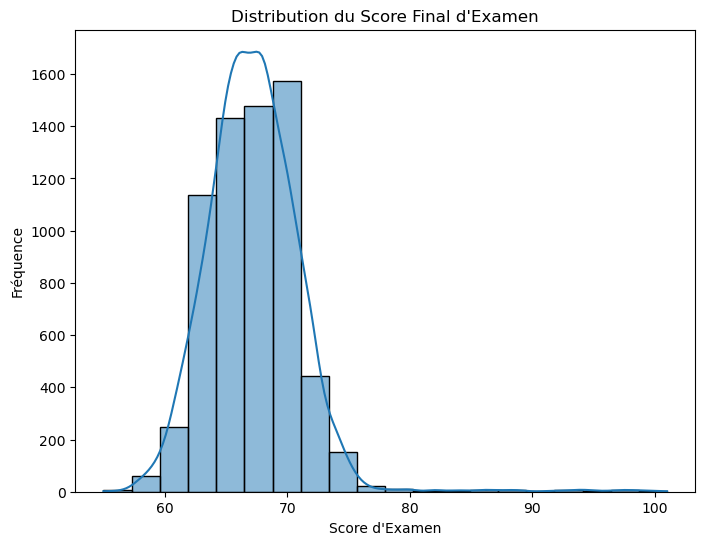

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Exam_Score'], kde=True, bins=20)
plt.title("Distribution du Score Final d'Examen")
plt.xlabel('Score d\'Examen')
plt.ylabel('Fréquence')
plt.show()

## Interprétation : 
Le graphique ci-dessus montre la distribution de la variable cible Exam_Score, correspondant aux notes finales des étudiants, à travers un histogramme enrichi d'une courbe KDE (Kernel Density Estimation). Le graphique révèle une distribution quasi-normale des notes d'examen, avec une forte concentration autour de 70 et de rares extrêmes. Cela indique une population d'étudiants relativement homogène en termes de performances. La courbe KDE, qui utilise un noyau gaussien, confirme cette tendance et fournit une estimation continue de la densité des tests.

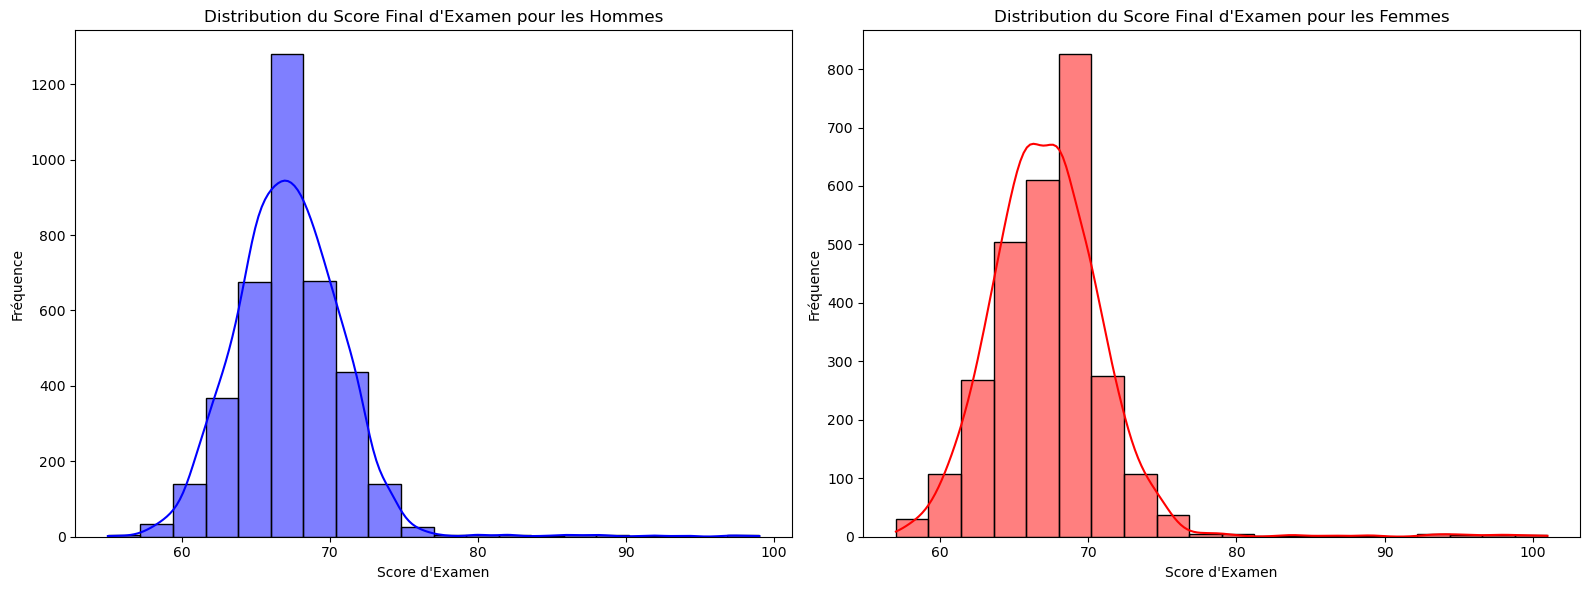

In [20]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1) 
sns.histplot(data=df[df['Gender'] == 'Male'], x='Exam_Score', kde=True, bins=20, color='blue')
plt.title("Distribution du Score Final d'Examen pour les Hommes")
plt.xlabel('Score d\'Examen')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2) 
sns.histplot(data=df[df['Gender'] == 'Female'], x='Exam_Score', kde=True, bins=20, color='red')
plt.title("Distribution du Score Final d'Examen pour les Femmes")
plt.xlabel('Score d\'Examen')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

## Interpretation:

Les graphiques comparent les distributions des résultats des tests entre les hommes et les femmes. Les deux groupes ont des distributions similaires, mais avec des différences dans la dispersion et la fréquence des extrêmes.
La distribution du score final d'examen pour les hommes est étroite, avec un pic principal légèrement inférieur à 70 (autour de 68-69). La majorité des scores sont concentrés dans la fourchette 65-75, et les scores extrêmes (<60 et >80) sont rares. La courbe KDE (bleue) montre une forte densité autour de ce pic. Quant à la distribution des femmes, elle est plus étalée, avec également un pic principal Le pic à 70, qui est plus élevé que celui des hommes, situé légèrement en dessous à 68-69. Les scores masculins sont plus homogènes et concentrés, avec une faible dispersion autour de la moyenne. En revanche, les résultats féminins montrent une distribution plus étendue, marquée par une proportion plus importante de scores très faibles et très élevés.

#### b. Distribution des variables numériques

#### Hours_Studied : Nombre d'heures d'étude

##### Valeurs aberrantes : Détection des valeurs aberrantes à l'aide de la méthode de l'IQR ou des boxplots (Juste testé, plus nécessaire car il n'y a pas de valeurs aberranntes. Sinon les regressions seront biaisées)

In [46]:
#Q1 = df['Hours_Studied'].quantile(0.25)
#Q3 = df['Hours_Studied'].quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
#df = df[(df['Hours_Studied'] >= lower_bound) & (df['Hours_Studied'] <= upper_bound)]

/var/folders/qj/c2jndvs9183byxh5lt4p50c40000gn/T/ipykernel_97957/4615665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Hours_Studied', palette=['blue', 'red'], inner='quartile')


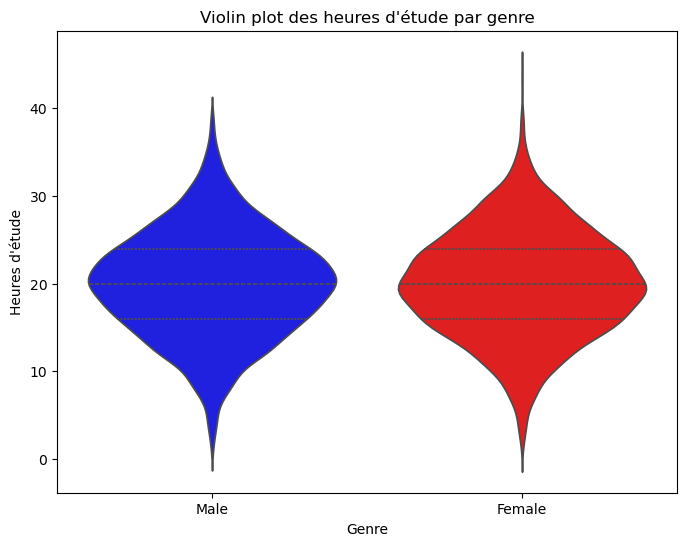

In [22]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Gender', y='Hours_Studied', palette=['blue', 'red'], inner='quartile')
plt.title("Violin plot des heures d'étude par genre")
plt.xlabel("Genre")
plt.ylabel("Heures d'étude")
plt.show()






## Interprétation : 
Ce **violin plot** illustre la distribution des heures d’étude pour les hommes et les femmes, en fournissant des informations sur la densité, la variabilité et les tendances centrales. Les deux genres présentent des distributions symétriques et similaires, avec une densité maximale autour de **20 heures**, ce qui correspond à la médiane pour les deux groupes. La majorité des individus, qu’ils soient hommes ou femmes, consacrent entre **15 et 25 heures** à l’étude, comme le montrent les plages principales de densité.

Cependant, des différences subtiles apparaissent. La distribution des femmes est légèrement plus étalée, reflétant une **variabilité légèrement plus élevée** par rapport à celle des hommes. En particulier, une proportion marginalement plus importante de femmes étudient pendant un grand nombre d’heures (supérieur à 30), ce qui est visible par une queue supérieure plus marquée dans leur distribution. En revanche, les hommes montrent une répartition un peu plus concentrée, avec moins de valeurs extrêmes.

Les deux groupes présentent également des individus aux extrémités des distributions, avec quelques personnes étudiant très peu (moins de 5 heures de temps d'études) ou beaucoup (plus de 35 heures).Le comportements d’étude entre hommes et femmes est globalement similaire, avec de petites variations dans la concentration et la proportion d’heures d’étude élevées chez les femmes.


#### Sleep_Hours : Nombre d'heures de sommeil

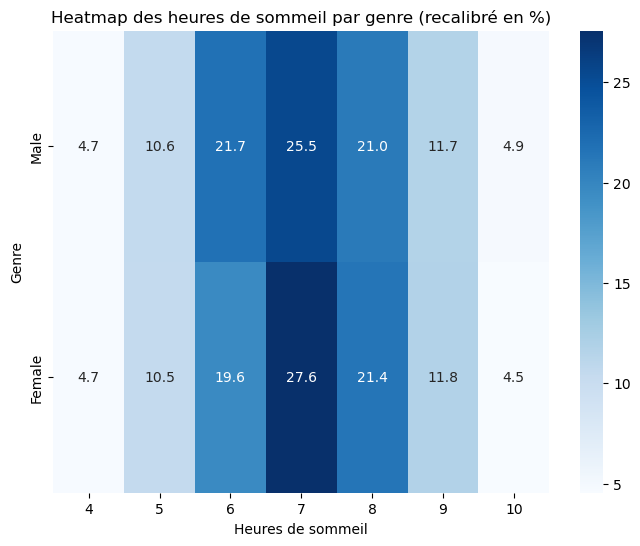

In [24]:
grouped_data = df.groupby(['Gender', 'Sleep_Hours']).size().unstack(fill_value=0)
Male = grouped_data.loc['Male']  
Female = grouped_data.loc['Female'] 
normalized_male = (Male / Male.sum()) * 100
normalized_female = (Female / Female.sum()) * 100
heatmap_data = pd.DataFrame({'Male': normalized_male, 'Female': normalized_female}).fillna(0).T


plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".1f")
plt.title("Heatmap des heures de sommeil par genre (recalibré en %)")
plt.xlabel("Heures de sommeil")
plt.ylabel("Genre")
plt.show()


## Interpretation:
Ce heatmap des heures de sommeil par genre (en pourcentage) représente la proportion d'hommes et de femmes dormant un certain nombre d'heures, normalisée en pourcentage pour chaque groupe. Cela permet une comparaison équitable, indépendamment de la taille de l’échantillon de chaque genre. La majorité des individus dorment entre **6 et 8 heures** pour tous les deux genres confondus, avec un pic à **7 heures, représentant 25,5 % des hommes et 27,6 % des femmes**. Les heures autour de **6, 7 et 8 heures** dominent, regroupant en tout  environ **68 %** des hommes et **68,6 %** des femmes. Les durées extrêmes de sommeil (inférieur à 5 ou supérieur à 9 heures de sommeil) sont rares, avec des proportions similaires pour les deux groupes: **4,7 %** dorment 4 heures, tandis que **4,9 %** des hommes et **4,5 %** des femmes dorment 10 heures.

En comparant les genres, les hommes montrent une distribution plus concentrée autour de 7 heures **(25,5 %) et 6 heures (21,7 %)**, tandis que les femmes ont une proportion légèrement plus élevée à 7 heures **(27,6 %)**. 

#### Previous_Scores par genre

/var/folders/qj/c2jndvs9183byxh5lt4p50c40000gn/T/ipykernel_97957/154697073.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Previous_Scores', palette=['blue', 'red'])


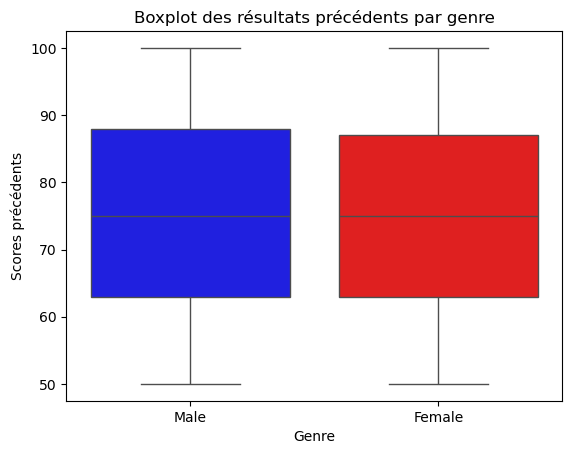

In [26]:
sns.boxplot(data=df, x='Gender', y='Previous_Scores', palette=['blue', 'red'])
plt.title("Boxplot des résultats précédents par genre")
plt.xlabel("Genre")
plt.ylabel("Scores précédents")
plt.show()


## Interpretation:
Ce boxplot montre que les résultats précédents sont quasiment identiques entre les hommes et les femmes : les médianes, les quartiles, et les plages des scores sont similaires.
Aucune différence notable n’est observée dans la distribution ou la variabilité des scores. Cette visualisation nous informe que le genre n’influence pas directement les résultats précédents dans notre échnatillon.


#### Distribution de la variable Tutoring_Sessions par genre

/var/folders/qj/c2jndvs9183byxh5lt4p50c40000gn/T/ipykernel_97957/3307396843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Tutoring_Sessions', palette=['blue', 'red'], inner='quartile')


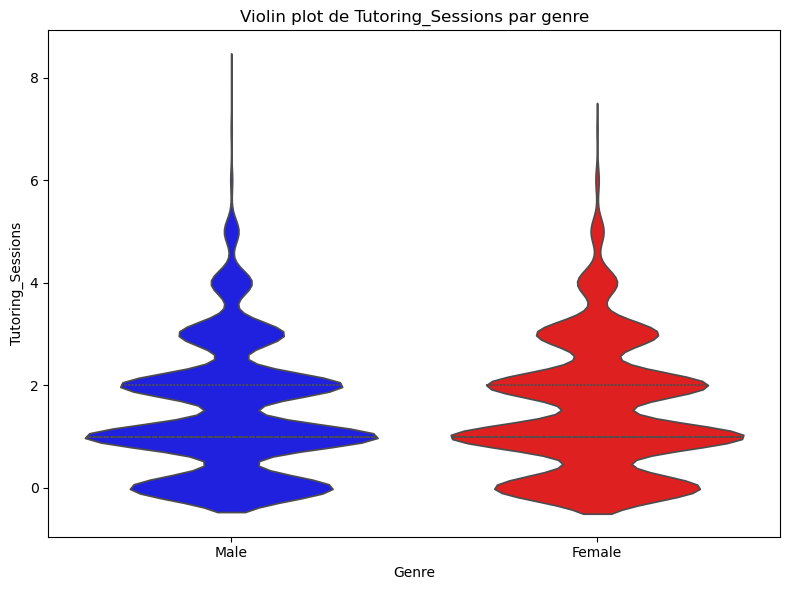

In [28]:
plt.figure(figsize=(8, 6))

sns.violinplot(data=df, x='Gender', y='Tutoring_Sessions', palette=['blue', 'red'], inner='quartile')
plt.title("Violin plot de Tutoring_Sessions par genre")
plt.xlabel("Genre")
plt.ylabel("Tutoring_Sessions")

plt.tight_layout()
plt.show()



## Interprétation: 
Ce graphique indique que les sessions de tutorat sont globalement faibles et concentrées autour de 1 session pour les hommes comme pour les femmes. Les distributions sont similaires, avec une légère dispersion supplémentaire chez les hommes pour les valeurs extrêmes (nombre élevé de sessions). Cela suggère que le genre n'est pas un facteur déterminant dans le recours aux sessions de tutorat. 

/var/folders/qj/c2jndvs9183byxh5lt4p50c40000gn/T/ipykernel_97957/811525067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Gender', y='Attendance', palette=['blue', 'red'], alpha=0.7)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

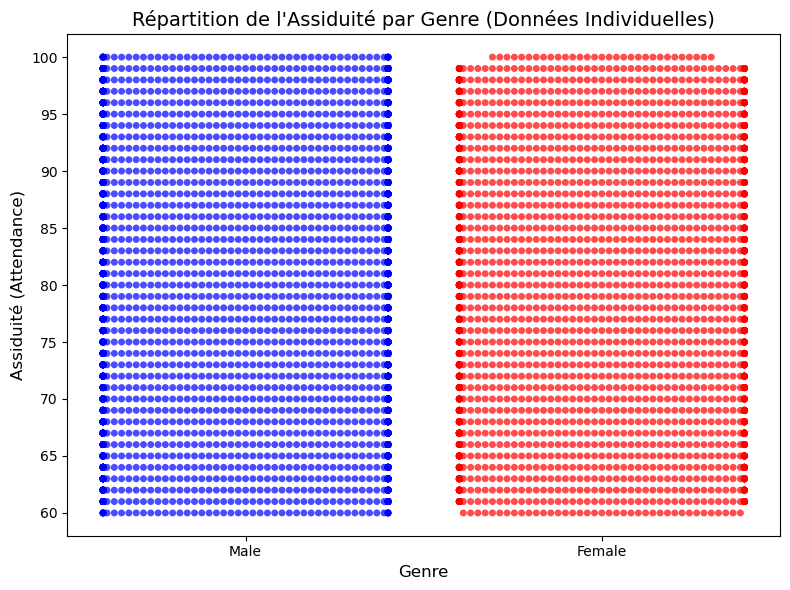

In [30]:
plt.figure(figsize=(8, 6))

sns.swarmplot(data=df, x='Gender', y='Attendance', palette=['blue', 'red'], alpha=0.7)
plt.title("Répartition de l'Assiduité par Genre (Données Individuelles)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Assiduité (Attendance)", fontsize=12)
plt.tight_layout()
plt.show()


## Interpretation


#### c. Distribution de certaines variables catégorielles

Variables catégorielles : 'Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'

/var/folders/qj/c2jndvs9183byxh5lt4p50c40000gn/T/ipykernel_97957/3694028287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette=['blue', 'red'])


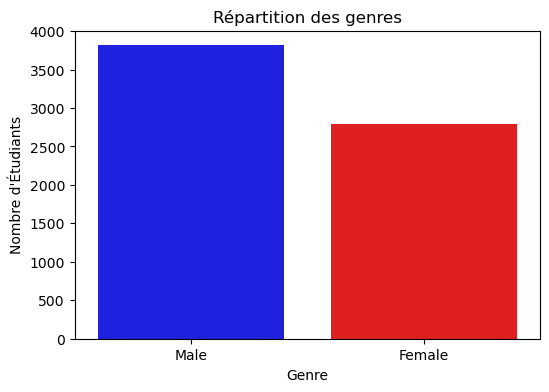

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette=['blue', 'red'])
plt.title("Répartition des genres")
plt.xlabel("Genre")
plt.ylabel("Nombre d'Étudiants")
plt.show()


## Interpretation:


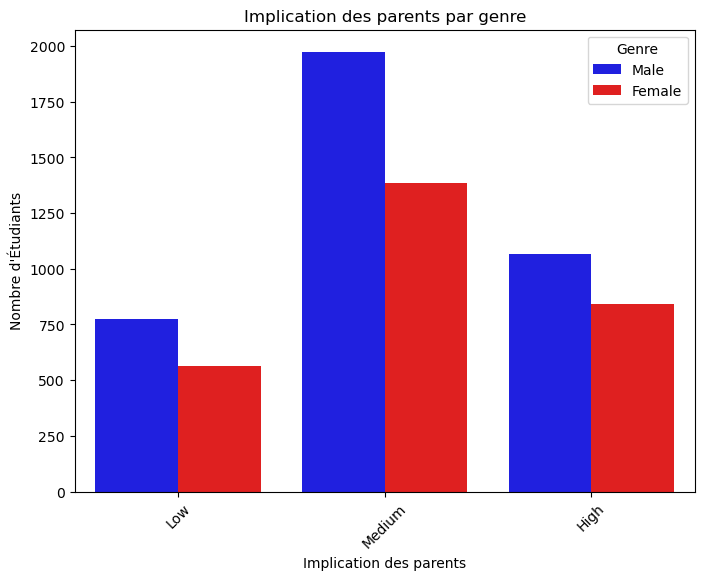

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Parental_Involvement', data=df, hue='Gender', palette=['blue', 'red'])
plt.title("Implication des parents par genre")
plt.xlabel("Implication des parents")
plt.ylabel("Nombre d'Étudiants")
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()


## Interpretation


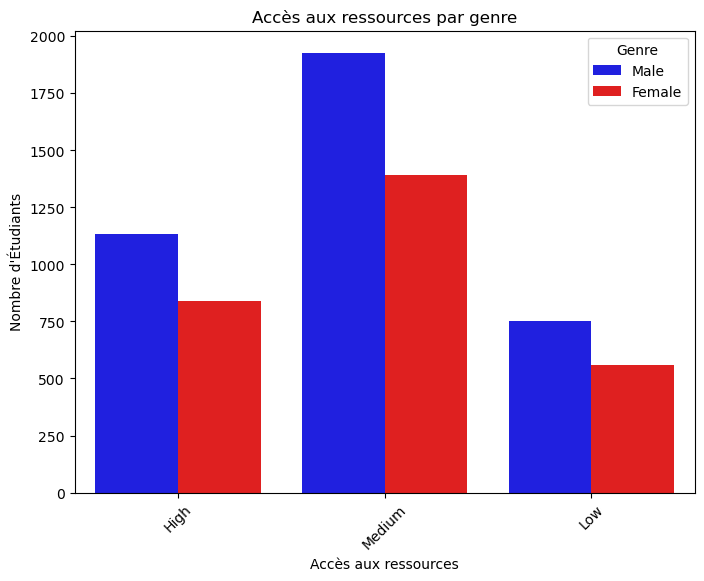

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Access_to_Resources', data=df, hue='Gender', palette=['blue', 'red'])
plt.title("Accès aux ressources par genre")
plt.xlabel("Accès aux ressources")
plt.ylabel("Nombre d'Étudiants")
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()


## Interpretation



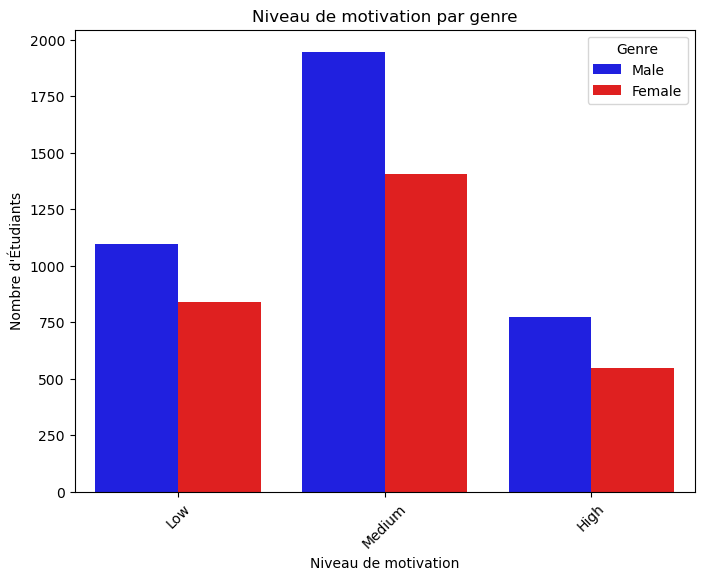

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Motivation_Level', data=df, hue='Gender', palette=['blue', 'red'])
plt.title("Niveau de motivation par genre")
plt.xlabel("Niveau de motivation")
plt.ylabel("Nombre d'Étudiants")
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()


## Interpretation


## 2. Prétraitement des données 

### 2.1 Encodage des variables catégorielles 

#### 2.1.1 Variables avec des catégories ordinales 

Les variables Parental_Involvement, Access_to_Resources, Motivation_Level, Family_Income, Teacher_Quality, Parental_Education_Level et Distance_from_Home ont un ordre naturel (par exemple, Low, Medium, High ou Near, Moderate, Far). Nous utilisation donc du Label Encoding, où chaque catégorie reçoit une valeur numérique selon son ordre

In [40]:
ordinal_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 
    'Family_Income', 'Teacher_Quality', 'Parental_Education_Level', 
    'Distance_from_Home'
]

categories = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Far', 'Moderate', 'Near']
}

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

for col in ordinal_columns:
    mask = df[col].notna()  
    df.loc[mask, col] = encoder.fit_transform(df.loc[mask, [col]])

ordinal_encodings = {
    col: {cat: i for i, cat in enumerate(categories[col])}
    for col in ordinal_columns
}

#### 2.1.2 Variables binaires (avec seulement deux catégories) :

Nous utilisons le binary Encodinge binaire (0 ou 1) pour les vaiables binaires Extracurricular_Activities, Internet_Access, Learning_Disabilities et Gender.

In [42]:
binary_columns = [
    'Gender', 'Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities'
]

label_encoder = LabelEncoder()
binary_encodings = {}

for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))
    binary_encodings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

#### 2.1.3 Variables sans ordre clair (non ordinales) :

School_Type et Peer_Influence sont transformées directement dans le DataFrame, remplaçant les valeurs textuelles par des codes numériques.

In [44]:
non_ordinal_columns = ['Peer_Influence', 'School_Type']

One_Hot_Encodings = {}

label_encoder = LabelEncoder()

for col in non_ordinal_columns:
    df[col] = label_encoder.fit_transform(df[col])
    One_Hot_Encodings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

#### Dictionnaires des encodages

In [46]:
def encoding_to_dataframe(encoding_data, encoding_type):
    encoding_list = []  
    for col, encoding in encoding_data.items():
        for category, value in encoding.items():
            encoding_list.append({'Column': col, 'Category': category, 'Value': value, 'Encoding Type': encoding_type})

    encoding_df = pd.DataFrame(encoding_list)
    return encoding_df

ordinal_df = encoding_to_dataframe(ordinal_encodings, 'Ordinal Encodings')
binary_df = encoding_to_dataframe(binary_encodings, 'Binary Encodings')
one_hot_df = encoding_to_dataframe(One_Hot_Encodings, 'One-Hot Encodings')  

def display_table(df, title):
    styled_df = df.style.set_table_attributes("style='width: 100%; border: solid 1px black;'").set_caption(title)
    display(styled_df)

display_table(ordinal_df, "Ordinal Encodings")
display_table(binary_df, "Binary Encodings")
display_table(one_hot_df, "One-Hot Encodings")

,Column,Category,Value,Encoding Type
0,Parental_Involvement,Low,0,Ordinal Encodings
1,Parental_Involvement,Medium,1,Ordinal Encodings
2,Parental_Involvement,High,2,Ordinal Encodings
3,Access_to_Resources,Low,0,Ordinal Encodings
4,Access_to_Resources,Medium,1,Ordinal Encodings
5,Access_to_Resources,High,2,Ordinal Encodings
6,Motivation_Level,Low,0,Ordinal Encodings
7,Motivation_Level,Medium,1,Ordinal Encodings
8,Motivation_Level,High,2,Ordinal Encodings
9,Family_Income,Low,0,Ordinal Encodings


,Column,Category,Value,Encoding Type
0,Gender,Female,0,Binary Encodings
1,Gender,Male,1,Binary Encodings
2,Extracurricular_Activities,No,0,Binary Encodings
3,Extracurricular_Activities,Yes,1,Binary Encodings
4,Internet_Access,No,0,Binary Encodings
5,Internet_Access,Yes,1,Binary Encodings
6,Learning_Disabilities,No,0,Binary Encodings
7,Learning_Disabilities,Yes,1,Binary Encodings


,Column,Category,Value,Encoding Type
0,Peer_Influence,Negative,0,One-Hot Encodings
1,Peer_Influence,Neutral,1,One-Hot Encodings
2,Peer_Influence,Positive,2,One-Hot Encodings
3,School_Type,Private,0,One-Hot Encodings
4,School_Type,Public,1,One-Hot Encodings


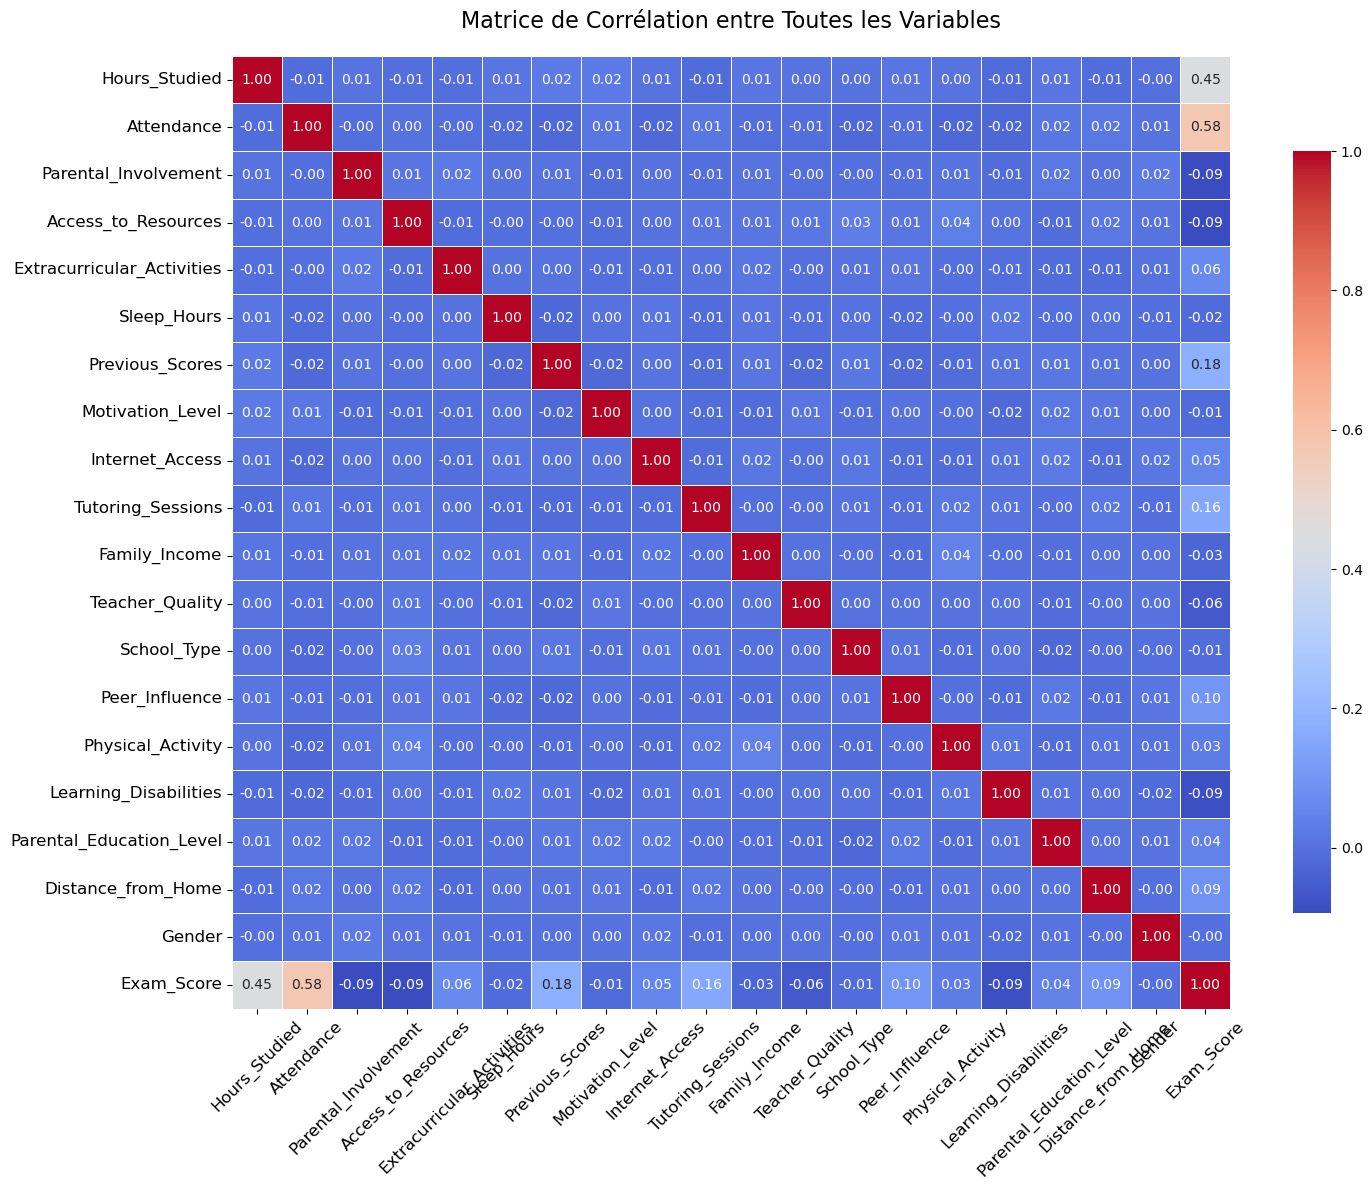

In [48]:
corr_matrix = df.corr(method='pearson')  
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix,
    annot=True,  
    cmap='coolwarm',  
    fmt='.2f',  
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}  
)
plt.title("Matrice de Corrélation entre Toutes les Variables", fontsize=16, pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

## Interpretation de la matrice de correlation

La matrice de corrélation ci dessus met en évidence les relations entre les variables de notre dataset et révèle les facteurs influençant les scores aux examens. Les variables les plus corrélées positivement à **Exam_Score** sont **Attendance** (0.58), le facteur le plus déterminant, suivi par **Hours_Studied** (0.45), indiquant que l’assiduité et le temps d’étude jouent un rôle majeur dans la réussite. Les **scores précédents** (0.18), le **niveau de motivation** (0.16), et les **sessions de tutorat** (0.16) ont également un impact positif mais plus modéré. En revanche, des variables comme **Internet_Access**, **Family_Income**, et **Physical_Activity** présentent des corrélations proches de zéro, ce qui suggère une absence d’impact notable. Les **difficultés d’apprentissage** (-0.09) et les **activités extrascolaires** (-0.09) montrent de légères corrélations négatives, indiquant un effet mineur mais défavorable. Les relations entre les variables indépendantes, comme **Parental_Involvement** et **Access_to_Resources** (0.10), sont faibles et peu significatives.


### 2.3 Vérification des valeurs manquantes


In [50]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### 2.4 Gestion des valeurs manquantes 

In [52]:
rows_with_missing = df.isnull().any(axis=1)
num_rows_with_missing = rows_with_missing.sum()
total_rows = len(df)
percentage_rows_with_missing = (num_rows_with_missing / total_rows) * 100

print(f"Nombre de lignes avec des valeurs manquantes : {num_rows_with_missing}")
print(f"Pourcentage de lignes avec des valeurs manquantes : {percentage_rows_with_missing:.2f}%")

Nombre de lignes avec des valeurs manquantes : 229
Pourcentage de lignes avec des valeurs manquantes : 3.47%


Etant donné que le taux d'individus avec au moins une données manquantes est de 3,47% nous faisons le choix de les supprimer. 

In [54]:
df = df.dropna()

In [56]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [58]:
df.shape

(6378, 20)

Le nombre d'observations passe donc de 6607 à 6378.

In [60]:
display(df.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1.0,0.0,0,7,73,1.0,1,0,1.0,2.0,1,2,3,0,1.0,2.0,1,67
1,19,64,1.0,2.0,0,8,59,1.0,1,2,2.0,2.0,1,0,4,0,0.0,1.0,0,61
2,24,98,2.0,2.0,1,7,91,2.0,1,2,2.0,2.0,1,1,4,0,2.0,2.0,1,74
3,29,89,1.0,2.0,1,8,98,2.0,1,1,2.0,2.0,1,0,4,0,1.0,1.0,1,71
4,19,92,2.0,2.0,1,6,65,2.0,1,3,2.0,0.0,1,1,4,0,0.0,2.0,0,70


In [62]:
df.to_csv('StudentPerformanceFactors_Prepared.csv', index=False)
df = pd.read_csv('StudentPerformanceFactors_Prepared.csv')

## 3. Création des modèles 

#### Nous avons fait le choix de séparer des données d'entraînement et de test (80%/20%)

In [64]:
# Séparation des variables indépendantes (X) et dépendantes (y)
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']
# Division en jeu d'entraînement et jeu de test (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### a. Modèle de Régression 

### Linéaire



### Modèle global (généralisation)

Interprétation : 

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Division en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Évaluation des performances
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Affichage des résultats
print("Régression Linéaire - Jeu d'Entraînement")
print(f"MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")

print("\nRégression Linéaire - Jeu de Test")
print(f"MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")

# Affichage des coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients de la régression linéaire :")
print(coefficients)

# Enregistrement des prédictions dans deux DataFrames distincts pour test et entraînement
test_predictions_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_test": y_pred_test
})

train_predictions_df = pd.DataFrame({
    "y_train": y_train,
    "y_pred_train": y_pred_train
})

# Affichage des premières lignes des prédictions
print("\nPrédictions sur le jeu de test :")
print(test_predictions_df.head())

print("\nPrédictions sur le jeu d'entraînement :")
print(train_predictions_df.head())


Régression Linéaire - Jeu d'Entraînement
MSE: 5.47, RMSE: 2.34, R²: 0.64

Régression Linéaire - Jeu de Test
MSE: 5.22, RMSE: 2.28, R²: 0.66

Coefficients de la régression linéaire :
                      Variable  Coefficient
0                Hours_Studied     0.292556
1                   Attendance     0.197603
2         Parental_Involvement    -0.407463
3          Access_to_Resources    -0.403129
4   Extracurricular_Activities     0.540935
5                  Sleep_Hours    -0.023313
6              Previous_Scores     0.047333
7             Motivation_Level    -0.178628
8              Internet_Access     0.909494
9            Tutoring_Sessions     0.481555
10               Family_Income    -0.162006
11             Teacher_Quality    -0.259737
12                 School_Type     0.008384
13              Peer_Influence     0.515004
14           Physical_Activity     0.180638
15       Learning_Disabilities    -0.861904
16    Parental_Education_Level     0.169702
17          Distance_from_

### LASSO

### Modèle global (généralisation)

In [68]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Définir la grille de recherche pour alpha
param_grid = {'alpha': [0.01, 0.05, 0.1, 0.2]}

# Modèle Lasso
lasso = Lasso()

# Recherche en grille avec validation croisée
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Meilleur modèle
lasso_best = grid_search.best_estimator_

# Prédictions
y_pred_train = lasso_best.predict(X_train)
y_pred_test = lasso_best.predict(X_test)

# Évaluation des performances
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Afficher les résultats
print("Lasso Regression avec la meilleure valeur de alpha")
print(f"MSE (train): {mse_train:.2f}, RMSE (train): {rmse_train:.2f}, R² (train): {r2_train:.2f}")
print(f"MSE (test): {mse_test:.2f}, RMSE (test): {rmse_test:.2f}, R² (test): {r2_test:.2f}")

# Affichage des coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso_best.coef_})
print("\nCoefficients du modèle Lasso :")
print(coefficients)

# Enregistrement des prédictions dans deux DataFrames distincts pour test et entraînement
test_predictions_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_test": y_pred_test
})

train_predictions_df = pd.DataFrame({
    "y_train": y_train,
    "y_pred_train": y_pred_train
})

# Affichage des premières lignes des prédictions
print("\nPrédictions sur le jeu de test :")
print(test_predictions_df.head())

print("\nPrédictions sur le jeu d'entraînement :")
print(train_predictions_df.head())

# Sauvegarde des résultats dans des fichiers Excel
test_predictions_df.to_excel("lasso_test_predictions.xlsx", index=False)
train_predictions_df.to_excel("lasso_train_predictions.xlsx", index=False)
print("\nLes prédictions ont été sauvegardées dans 'lasso_test_predictions.xlsx' et 'lasso_train_predictions.xlsx'.")


Lasso Regression avec la meilleure valeur de alpha
MSE (train): 5.47, RMSE (train): 2.34, R² (train): 0.64
MSE (test): 5.22, RMSE (test): 2.29, R² (test): 0.66

Coefficients du modèle Lasso :
                      Variable  Coefficient
0                Hours_Studied     0.292239
1                   Attendance     0.197536
2         Parental_Involvement    -0.392298
3          Access_to_Resources    -0.389864
4   Extracurricular_Activities     0.498925
5                  Sleep_Hours    -0.018838
6              Previous_Scores     0.047269
7             Motivation_Level    -0.161101
8              Internet_Access     0.760596
9            Tutoring_Sessions     0.475530
10               Family_Income    -0.142808
11             Teacher_Quality    -0.248254
12                 School_Type     0.000000
13              Peer_Influence     0.498465
14           Physical_Activity     0.168597
15       Learning_Disabilities    -0.753592
16    Parental_Education_Level     0.150432
17          Dist

Interprétation : 

### Ridge 

### Modèle global (généralisation)

Interprétation :

In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Définir la grille de recherche pour alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Modèle Ridge
ridge = Ridge()

# Recherche en grille avec validation croisée
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Meilleur modèle
ridge_best = grid_search.best_estimator_

# Prédictions
y_pred_train = ridge_best.predict(X_train)
y_pred_test = ridge_best.predict(X_test)

# Évaluation des performances
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Afficher les résultats
print("Ridge Regression avec la meilleure valeur de alpha")
print(f"MSE (train): {mse_train:.2f}, RMSE (train): {rmse_train:.2f}, R² (train): {r2_train:.2f}")
print(f"MSE (test): {mse_test:.2f}, RMSE (test): {rmse_test:.2f}, R² (test): {r2_test:.2f}")

# Affichage des coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': ridge_best.coef_})
print("\nCoefficients du modèle Ridge :")
print(coefficients)

# Enregistrement des prédictions dans deux DataFrames distincts pour test et entraînement
test_predictions_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_test": y_pred_test
})

train_predictions_df = pd.DataFrame({
    "y_train": y_train,
    "y_pred_train": y_pred_train
})

# Affichage des premières lignes des prédictions
print("\nPrédictions sur le jeu de test :")
print(test_predictions_df.head())

print("\nPrédictions sur le jeu d'entraînement :")
print(train_predictions_df.head())

# Sauvegarde des résultats dans des fichiers Excel
test_predictions_df.to_excel("ridge_test_predictions.xlsx", index=False)
train_predictions_df.to_excel("ridge_train_predictions.xlsx", index=False)
print("\nLes prédictions ont été sauvegardées dans 'ridge_test_predictions.xlsx' et 'ridge_train_predictions.xlsx'.")


Ridge Regression avec la meilleure valeur de alpha
MSE (train): 5.47, RMSE (train): 2.34, R² (train): 0.64
MSE (test): 5.22, RMSE (test): 2.28, R² (test): 0.66

Coefficients du modèle Ridge :
                      Variable  Coefficient
0                Hours_Studied     0.292548
1                   Attendance     0.197603
2         Parental_Involvement    -0.406183
3          Access_to_Resources    -0.402088
4   Extracurricular_Activities     0.536613
5                  Sleep_Hours    -0.023312
6              Previous_Scores     0.047330
7             Motivation_Level    -0.177932
8              Internet_Access     0.883893
9            Tutoring_Sessions     0.480921
10               Family_Income    -0.161275
11             Teacher_Quality    -0.259166
12                 School_Type     0.008507
13              Peer_Influence     0.513352
14           Physical_Activity     0.180043
15       Learning_Disabilities    -0.844111
16    Parental_Education_Level     0.169228
17          Dist

### b. Arbre de Décision
L'arbre de décision est un modèle non linéaire qui partitionne les données en fonction des caractéristiques pour prédire une valeur continue.

### Modèle global (généralisation)

Interprétation : 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs hyperparamètres : {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
Valeurs réelles (Min : 55, Max : 100)
Prédictions (Min : 58.666666666666664, Max : 79.66666666666667)

Performance du modèle optimisé - Training Set
MSE: 4.55, RMSE: 2.13, R²: 0.70

Performance du modèle optimisé - Test Set
MSE: 7.09, RMSE: 2.66, R²: 0.54

Importance des variables :
                      Variable  Importance
1                   Attendance    0.487575
0                Hours_Studied    0.294224
6              Previous_Scores    0.058052
2         Parental_Involvement    0.031708
3          Access_to_Resources    0.030545
9            Tutoring_Sessions    0.024102
10               Family_Income    0.014105
13              Peer_Influence    0.011988
11             Teacher_Quality    0.009098
7             Motivation_Level    0.008990
17          Distance_from_Home    0.007826
16    Parental_Education_Level    0.006781
4

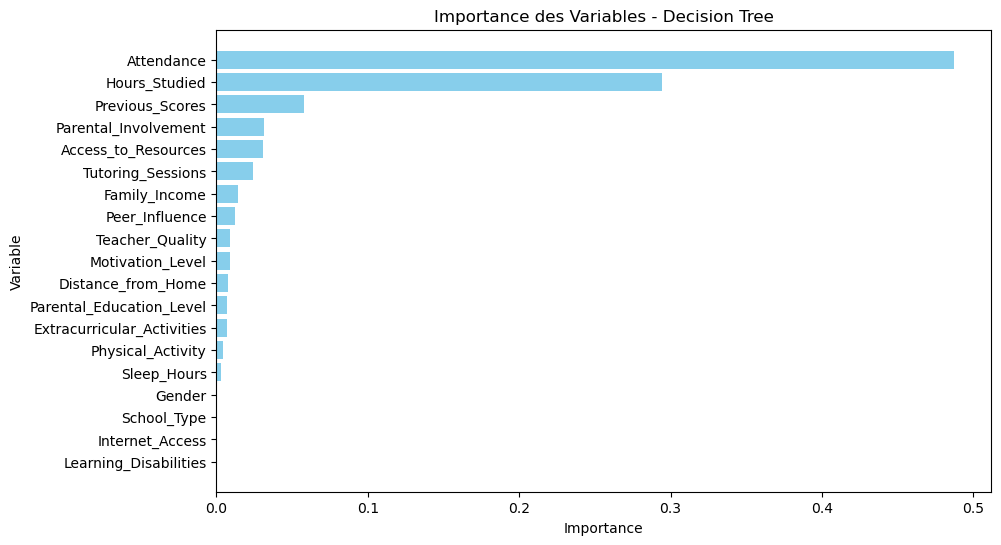

Les importances des variables ont été sauvegardées dans 'decision_tree_feature_importances.xlsx'.
Les prédictions ont été sauvegardées dans 'decision_tree_predictions.xlsx'.


In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Préparation des données
X = df.drop(columns=['Exam_Score'])  # Variables explicatives
y = df['Exam_Score']  # Variable cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 1 : Définir la grille des hyperparamètres
param_grid = {
    'max_depth': [3, 5, 10, 15],  # Limiter la profondeur
    'min_samples_split': [2, 5, 10],  # Minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 5, 10],  # Minimum d'échantillons dans une feuille
}

# Étape 2 : Initialisation du modèle
dt_model = DecisionTreeRegressor(random_state=42)

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print(f"Meilleurs hyperparamètres : {best_params}")

# Entraîner le modèle avec les meilleurs paramètres
best_dt_model = grid_search.best_estimator_

# Prédictions sur les ensembles d'entraînement et de test
y_pred_train = best_dt_model.predict(X_train)
y_pred_test = best_dt_model.predict(X_test)

# Étape 3 : Vérification des plages de prédictions
print(f"Valeurs réelles (Min : {y_test.min()}, Max : {y_test.max()})")
print(f"Prédictions (Min : {y_pred_test.min()}, Max : {y_pred_test.max()})")

# Étape 4 : Calcul des métriques
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nPerformance du modèle optimisé - Training Set")
print(f"MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")

print("\nPerformance du modèle optimisé - Test Set")
print(f"MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")

# Étape 5 : Importance des variables
feature_importances = pd.DataFrame({
    'Variable': X.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportance des variables :")
print(feature_importances)

# Visualisation des importances des variables
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Variable'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des Variables - Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# Sauvegarde des résultats dans un fichier Excel
feature_importances.to_excel("decision_tree_feature_importances.xlsx", index=False)
print("Les importances des variables ont été sauvegardées dans 'decision_tree_feature_importances.xlsx'.")

# Sauvegarde des prédictions dans un fichier Excel
predictions_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_test": y_pred_test
})
predictions_df.to_excel("decision_tree_predictions.xlsx", index=False)
print("Les prédictions ont été sauvegardées dans 'decision_tree_predictions.xlsx'.")


Interprétation :

### c. Forêt Aléatoire
La forêt aléatoire est un ensemble d'arbres de décision, où chaque arbre est construit sur un sous-ensemble aléatoire des données. Elle est plus robuste et généralement plus performante qu'un arbre de décision simple.

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Meilleurs hyperparamètres : {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Performance du Random Forest Optimisé - Training Set
MSE: 1.81, RMSE: 1.34, R²: 0.88

Performance du Random Forest Optimisé - Test Set
MSE: 5.60, RMSE: 2.37, R²: 0.64

Importance des variables :
                      Variable  Importance
1                   Attendance    0.409567
0                Hours_Studied    0.259902
6              Previous_Scores    0.084137
9            Tutoring_Sessions    0.034316
3          Access_to_Resources    0.029038
2         Parental_Involvement    0.025821
5                  Sleep_Hours    0.022222
14           Physical_Activity    0.020489
10               Family_Income    0.019551
13              Peer_Influence    0.014595
17          Distance_from_Home    0.013363
16    Parental_Education_Level    0.012733
11             Teacher_Quality    0.011930
7 

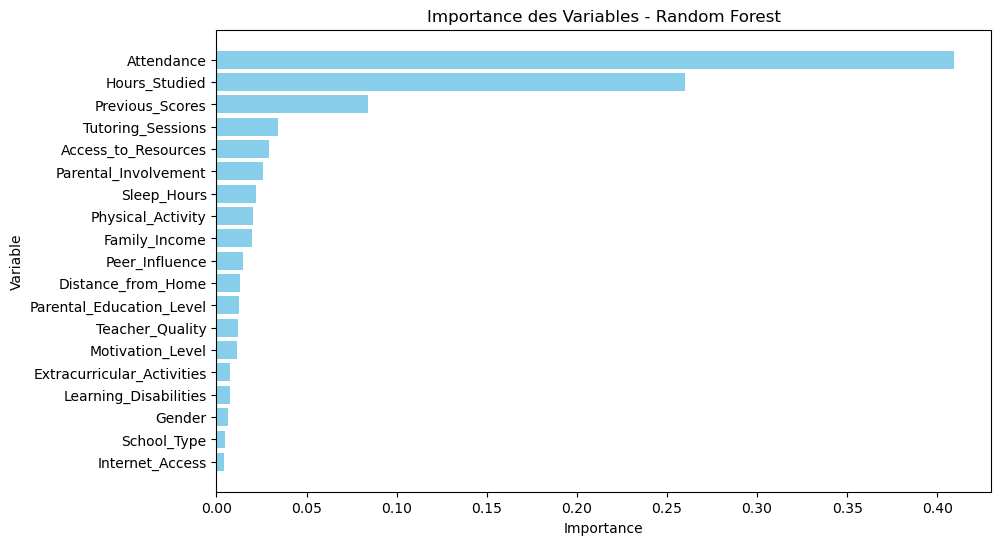


Prédictions sur le jeu de test :
      y_test  y_pred_test
2718      74    74.366671
4275      66    66.559357
4141      70    69.876117
1199      72    71.117112
4546      67    67.298322

Prédictions sur le jeu d'entraînement :
      y_train  y_pred_train
2275       70     70.484776
4603       67     67.021590
2202       62     62.526920
471        63     62.603429
4060       69     69.607365

Les prédictions ont été sauvegardées dans 'rf_test_predictions.xlsx' et 'rf_train_predictions.xlsx'.


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Préparation des données
X = df.drop(columns=['Exam_Score'])  # Variables explicatives
y = df['Exam_Score']  # Variable cible

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 2 : Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],             # Nombre d'arbres dans la forêt
    'max_depth': [5, 10, 15, None],             # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],            # Minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 5],              # Minimum d'échantillons dans une feuille
    'max_features': ['sqrt', 'log2', None]      # Nombre de variables prises en compte à chaque division
}

# Initialisation du modèle
rf_model = RandomForestRegressor(random_state=42)

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Étape 3 : Meilleurs hyperparamètres
best_params = grid_search.best_params_
print(f"Meilleurs hyperparamètres : {best_params}")

# Meilleur modèle
best_rf_model = grid_search.best_estimator_

# Étape 4 : Évaluation du modèle optimisé
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

# Calcul des métriques
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nPerformance du Random Forest Optimisé - Training Set")
print(f"MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")

print("\nPerformance du Random Forest Optimisé - Test Set")
print(f"MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")

# Étape 5 : Importance des variables
feature_importances = pd.DataFrame({
    'Variable': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportance des variables :")
print(feature_importances)

# Étape 6 : Visualisation des importances des variables
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Variable'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des Variables - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Étape 7 : Enregistrer les prédictions dans des DataFrames
test_predictions_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_test": y_pred_test
})

train_predictions_df = pd.DataFrame({
    "y_train": y_train,
    "y_pred_train": y_pred_train
})

# Affichage des premières lignes des prédictions
print("\nPrédictions sur le jeu de test :")
print(test_predictions_df.head())

print("\nPrédictions sur le jeu d'entraînement :")
print(train_predictions_df.head())

# Sauvegarde des prédictions dans des fichiers Excel
test_predictions_df.to_excel("rf_test_predictions.xlsx", index=False)
train_predictions_df.to_excel("rf_train_predictions.xlsx", index=False)
print("\nLes prédictions ont été sauvegardées dans 'rf_test_predictions.xlsx' et 'rf_train_predictions.xlsx'.")


### d. Modèles de Réseau de Neurones

### Modèle global (généralisation)

### Modèle de réseau (Une seule couche cachée)
Modèle très flexible qui peut apprendre des relations complexes entre les variables. Nous allons utiliser le modèle MLPRegressor de sklearn qui implémente un réseau de neurones multi-couches

In [82]:
!pip install tensorflow
!pip install keras-tuner

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from keras_tuner import Hyperband
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Préparation des données
X = df.drop(columns=['Exam_Score'])  # Variables explicatives
y = df['Exam_Score']  # Variable cible

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fonction pour construire le modèle
def build_model(hp):
    nn_simple_model = Sequential()
    
    # Ajout d'une couche cachée avec un nombre de neurones variable
    nn_simple_model.add(Dense(
        units=hp.Choice('units', [8, 16, 32, 64]),
        activation=hp.Choice('activation', ['relu', 'tanh']),
        input_dim=X_train_scaled.shape[1]
    ))
    
    # Couche de sortie
    nn_simple_model.add(Dense(1, activation='linear'))  # Régression
    
    # Compilation du modèle
    nn_simple_model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
        loss='mse',
        metrics=['mae']
    )
    return nn_simple_model

# Utilisation de Keras Tuner pour la recherche des hyperparamètres
tuner = Hyperband(
    build_model,
    objective='val_loss',  # Minimiser la perte sur l'ensemble de validation
    max_epochs=100,
    factor=3,
    directory='my_dir',
    project_name='tuning_nn_simple'
)

# Recherche des meilleurs hyperparamètres
tuner.search(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=32, verbose=1)

# Meilleurs hyperparamètres
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Meilleurs hyperparamètres : {best_hps.values}")

# Entraîner le meilleur modèle
nn_simple_model = tuner.hypermodel.build(best_hps)
history = nn_simple_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, verbose=1)

# Évaluation du modèle optimisé
y_pred_train = nn_simple_model.predict(X_train_scaled).flatten()
y_pred_test = nn_simple_model.predict(X_test_scaled).flatten()

# Calcul des métriques
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Affichage des performances
print("\nPerformance du Réseau de Neurones Simple - Training Set")
print(f"MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")

print("\nPerformance du Réseau de Neurones Simple - Test Set")
print(f"MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")

# Sauvegarde des prédictions dans des DataFrames
train_predictions_df = pd.DataFrame({
    "y_train": y_train,
    "y_pred_train": y_pred_train
})

test_predictions_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_test": y_pred_test
})

# Affichage des premières lignes des prédictions
print("\nPrédictions sur le jeu d'entraînement :")
print(train_predictions_df.head())

print("\nPrédictions sur le jeu de test :")
print(test_predictions_df.head())

# Sauvegarde dans des fichiers Excel
train_predictions_df.to_excel("nn_simple_train_predictions.xlsx", index=False)
test_predictions_df.to_excel("nn_simple_test_predictions.xlsx", index=False)

print("\nLes prédictions ont été sauvegardées dans 'nn_simple_train_predictions.xlsx' et 'nn_simple_test_predictions.xlsx'.")


Reloading Tuner from my_dir/tuning_nn_simple/tuner0.json
Meilleurs hyperparamètres : {'units': 64, 'activation': 'tanh', 'optimizer': 'sgd', 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}
Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 441.1817 - mae: 8.7200 - val_loss: 6.5437 - val_mae: 1.3970
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 6.2710 - mae: 1.3225 - val_loss: 6.0253 - val_mae: 1.2413
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 6.3193 - mae: 1.2699 - val_loss: 5.8105 - val_mae: 1.2021
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 6.8651 - mae: 1.2921 - val_loss: 5.6739 - val_mae: 1.1915
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 4.7139 - mae: 1.1587 - val_loss: 5.9646 - val_mae: 1.2391
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 6.2418 - mae: 1.2573 - val_loss: 5.7123 - val_mae: 1.2406
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 4.8234 - mae: 1.1600 - val_loss: 5.5965 - val_mae: 1.1632
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 5.7146 - mae: 1.1878 - val_loss: 5.6951 - val_mae: 1.2010
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 

Interpètation : 

### Modèle de réseau (Complexe)
Modèle avec une configuration adaptée pour capturer des relations plus complexes dans les données :

Trial 90 Complete [00h 00m 09s]
val_loss: 5.458569049835205

Best val_loss So Far: 5.458569049835205
Total elapsed time: 00h 04m 26s
Meilleurs hyperparamètres : {'num_layers': 2, 'units_0': 32, 'l2_0': 0.001, 'dropout_0': 0.3, 'learning_rate': 0.001, 'units_1': 32, 'l2_1': 0.001, 'dropout_1': 0.2, 'units_2': 64, 'l2_2': 0.01, 'dropout_2': 0.3, 'tuner/epochs': 50, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Epoch 1/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3898.2534 - mae: 61.9440 - val_loss: 1057.5472 - val_mae: 30.5937
Epoch 2/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 642.9949 - mae: 21.6605 - val_loss: 74.7149 - val_mae: 6.9307
Epoch 3/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 243.4792 - mae: 12.5002 - val_loss: 51.8723 - val_mae: 5.7170
Epoch 4/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 236.8505 - mae: 12.3373 - val_loss: 47.9384 - val_mae: 5.5140
Epoch 5/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 207.4

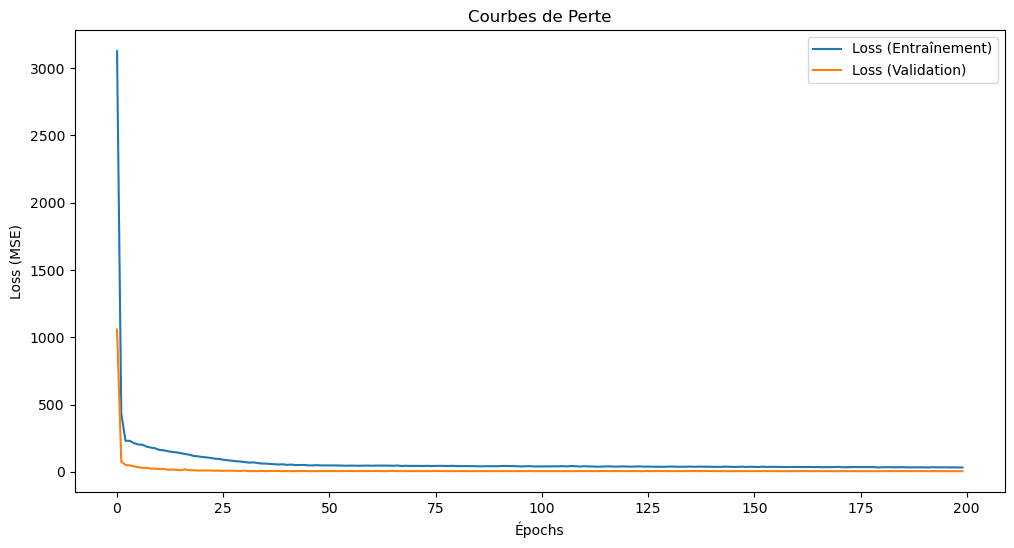


Prédictions sur le jeu d'entraînement :
      y_train  y_pred_train
2275       70     70.382721
4603       67     67.249573
2202       62     62.912514
471        63     62.265984
4060       69     69.325684

Prédictions sur le jeu de test :
      y_test  y_pred_test
2718      74    73.584457
4275      66    65.233025
4141      70    70.193207
1199      72    70.833878
4546      67    67.507919

Les prédictions ont été sauvegardées dans 'nn_complex_train_predictions.xlsx' et 'nn_complex_test_predictions.xlsx'.


In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras_tuner import Hyperband
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Préparation des données
X = df.drop(columns=['Exam_Score'])  # Variables explicatives
y = df['Exam_Score']  # Variable cible

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fonction pour construire le modèle
def build_model(hp):
    nn_complex_model = Sequential()
    
    # Ajouter des couches cachées dynamiquement
    for i in range(hp.Int('num_layers', 1, 3)):  # 1 à 3 couches cachées
        nn_complex_model.add(Dense(
            units=hp.Choice('units_' + str(i), [32, 64, 128]),  # 32, 64 ou 128 neurones
            activation='relu',
            kernel_regularizer=l2(hp.Choice('l2_' + str(i), [0.001, 0.01, 0.05]))
        ))
        nn_complex_model.add(Dropout(hp.Choice('dropout_' + str(i), [0.2, 0.3, 0.5])))  # Dropout : 20%, 30%, ou 50%

    # Couche de sortie
    nn_complex_model.add(Dense(1, activation='linear'))

    # Compilation du modèle
    nn_complex_model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.005, 0.01])),
        loss='mse',
        metrics=['mae']
    )
    return nn_complex_model

# Utilisation de Keras Tuner pour optimiser les hyperparamètres
tuner = Hyperband(
    build_model,
    objective='val_loss',  # Minimiser la perte de validation
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='nn_complex_tuning'
)

# Recherche des meilleurs hyperparamètres
tuner.search(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=32, verbose=1)

# Meilleurs hyperparamètres trouvés
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Meilleurs hyperparamètres : {best_hps.values}")

# Entraîner le meilleur modèle
nn_complex_model = tuner.hypermodel.build(best_hps)
history = nn_complex_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, batch_size=32, verbose=1)

# Évaluation du modèle
y_pred_train = nn_complex_model.predict(X_train_scaled).flatten()
y_pred_test = nn_complex_model.predict(X_test_scaled).flatten()

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nPerformance du Réseau de Neurones Complexe - Training Set")
print(f"MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")

print("\nPerformance du Réseau de Neurones Complexe - Test Set")
print(f"MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")

# Visualisation des courbes de perte
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss (Entraînement)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title("Courbes de Perte")
plt.xlabel("Épochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

# Sauvegarde des prédictions dans des DataFrames
train_predictions_df = pd.DataFrame({
    "y_train": y_train,
    "y_pred_train": y_pred_train
})

test_predictions_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred_test": y_pred_test
})

# Affichage des premières lignes des prédictions
print("\nPrédictions sur le jeu d'entraînement :")
print(train_predictions_df.head())

print("\nPrédictions sur le jeu de test :")
print(test_predictions_df.head())

# Sauvegarde dans des fichiers Excel
train_predictions_df.to_excel("nn_complex_train_predictions.xlsx", index=False)
test_predictions_df.to_excel("nn_complex_test_predictions.xlsx", index=False)

print("\nLes prédictions ont été sauvegardées dans 'nn_complex_train_predictions.xlsx' et 'nn_complex_test_predictions.xlsx'.")


## 4. Visualisation et ennregistrement des valeurs réellles et prédictes de Examen Score pour tous les modèles 

### Pour le Modèle global (généralisation)

Interprétation : 

#### Enregistrement des valeurs Réellles et prédictes de Examen Score (pour la généralisation)

Interprétation : 

## 5. Comparaison des modèles

Une fois que tous les modèles sont formés, nous pouvons comparer leurs performances en utilisant les mesures MSE (Mean Squared Error) et R² (coefficient de détermination). Les deux sont des indicateurs de la qualité du modèle :

Un MSE plus faible signifie que les prédictions sont proches des valeurs réelles.
Un R² plus élevé indique que le modèle explique mieux la variance des données.

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step

Comparaison des performances des modèles :
                     Modèle      MSE Train  RMSE Train      R² Train  \
0         Linear Regression       5.467261    2.338217      0.641806   
1             Random Forest       0.800039    0.894449      0.947584   
2             Decision Tree       0.000000    0.000000      1.000000   
3   Neural Network (Simple)      15.215681    3.900728      0.003126   
4  Neural Network (Complex)  203785.788452  451.426393 -13350.275631   
5          Ridge Regression       5.467262    2.338218      0.641806   
6          Lasso Regression       5.777710    2.403687      0.621466   

        MSE Test   RMSE Test       R² Test  
0       5.215195    2.283680      0.664387  
1       5.919586    2.433020      0.619058  
2      11.346395    3.368441      0.269827  
3      15.705595    3.963028   

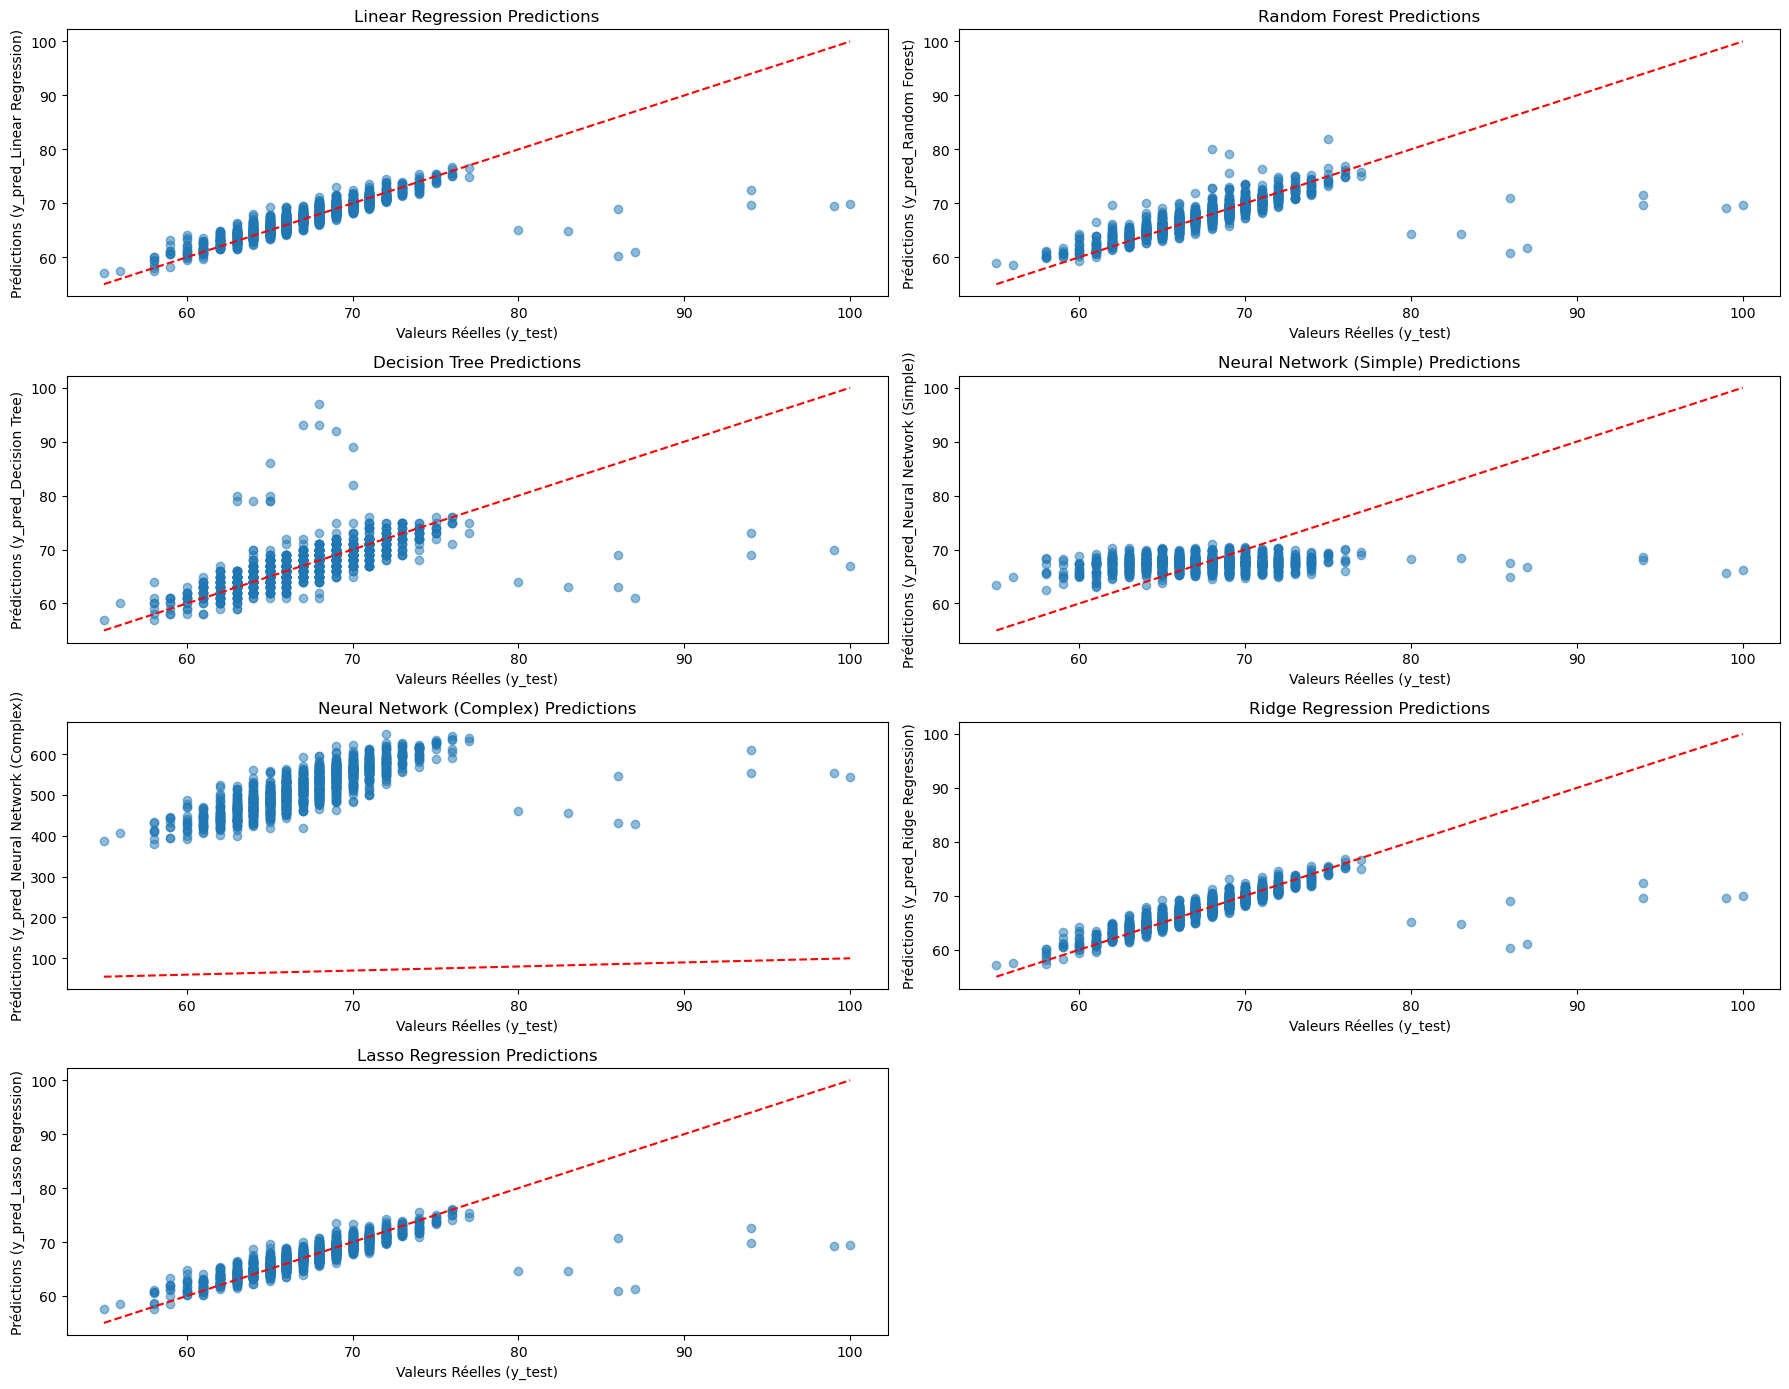


Les prédictions ont été sauvegardées dans 'all_model_predictions.xlsx'.
Les performances des modèles ont été sauvegardées dans 'model_performance_comparison.xlsx'.


In [93]:
# Régression Linéaire
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Régression Ridge
from sklearn.linear_model import Ridge
ridge_best = Ridge(alpha=1.0)
ridge_best.fit(X_train, y_train)

# Régression Lasso
from sklearn.linear_model import Lasso
lasso_best = Lasso(alpha=0.1)
lasso_best.fit(X_train, y_train)

# Réseau de Neurones Simple
# Assurez-vous que `nn_simple_model` est bien entraîné
nn_simple_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Réseau de Neurones Complexe
# Assurez-vous que `nn_complex_model` est bien entraîné
nn_complex_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Dictionnaire des modèles
models = {
    "Linear Regression": model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "Neural Network (Simple)": nn_simple_model,
    "Neural Network (Complex)": nn_complex_model,
    "Ridge Regression": ridge_best,
    "Lasso Regression": lasso_best
}

# Comparer les modèles et obtenir les prédictions
results_df, predictions = evaluate_models(models, X_train, X_test, y_train, y_test)

# Afficher les résultats
print("\nComparaison des performances des modèles :")
print(results_df)

# Visualisation des prédictions
plot_predictions(predictions, models)

# Sauvegarde des prédictions dans un fichier Excel
predictions.to_excel("all_model_predictions.xlsx", index=False)
results_df.to_excel("model_performance_comparison.xlsx", index=False)

print("\nLes prédictions ont été sauvegardées dans 'all_model_predictions.xlsx'.")
print("Les performances des modèles ont été sauvegardées dans 'model_performance_comparison.xlsx'.")



Comparaison des modèles :
                      Model           MSE         RMSE             R²
0         Linear Regression  5.215195e+00     2.283680       0.664387
1             Random Forest  5.597751e+00     2.365957       0.639769
2             Decision Tree  6.120366e+06  2473.937400 -393862.070900
3   Neural Network (Simple)  6.040962e+00     2.457837       0.611247
4  Neural Network (Complex)  6.040962e+00     2.457837       0.611247
5          Ridge Regression  5.216237e+00     2.283908       0.664320
6          LASSO Regression  5.221583e+00     2.285078       0.663976
Les résultats des modèles ont été sauvegardés dans 'model_comparison.xlsx'.
Les prédictions des modèles ont été sauvegardées dans 'model_predictions.xlsx'.


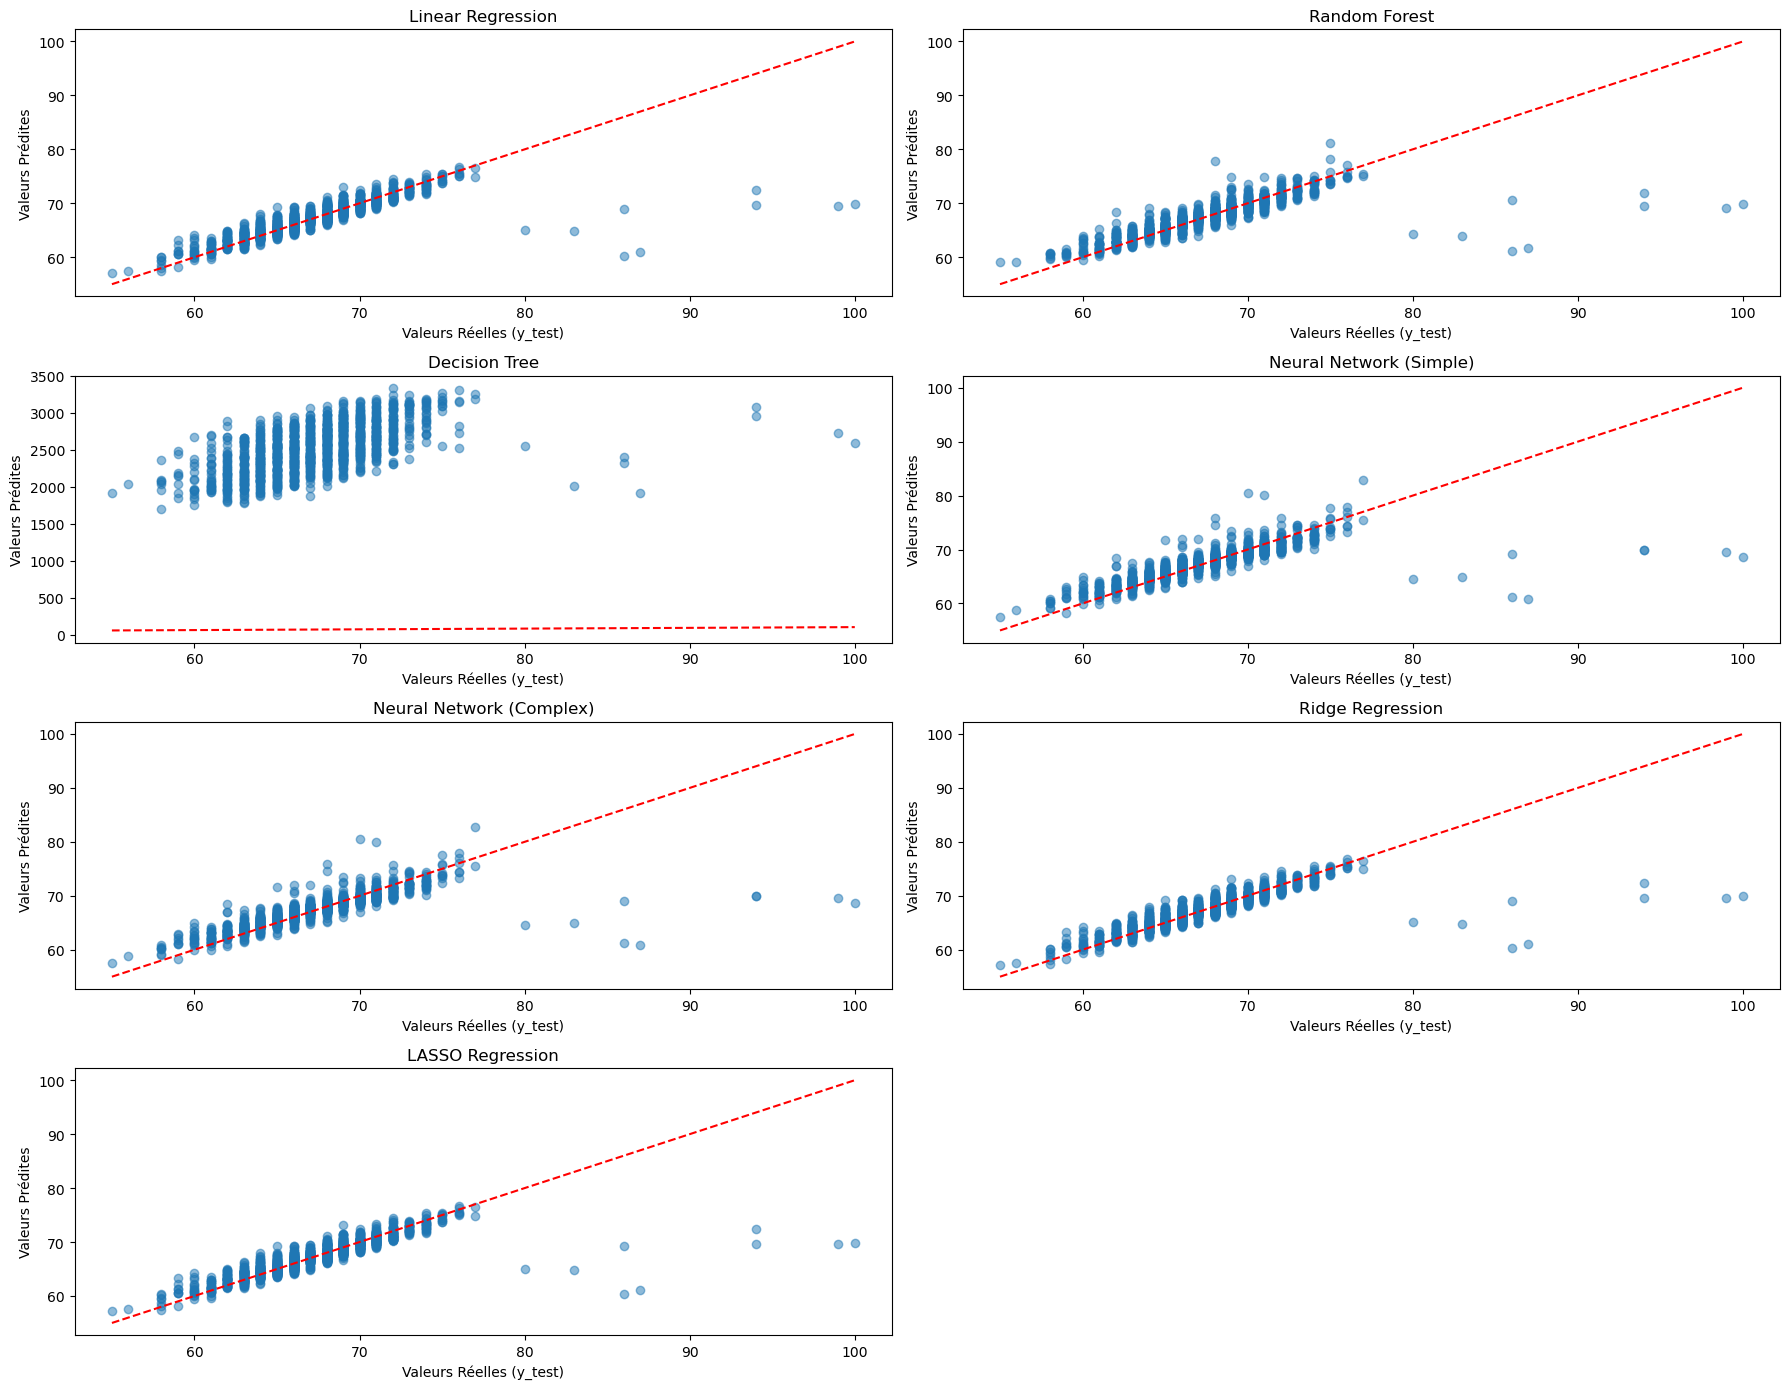

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Fonction pour s'assurer que toutes les prédictions sont bien au format 1D
def ensure_1d(y_pred):
    return y_pred.flatten() if len(y_pred.shape) > 1 else y_pred

# Assurez-vous que toutes les prédictions des modèles sont 1D
y_pred_lr = ensure_1d(y_pred_lr)                 # Régression linéaire
y_pred_rf = ensure_1d(y_pred_rf)                 # Random Forest
y_pred_tree = ensure_1d(y_pred_tree)             # Decision Tree
y_pred_nn_simple = ensure_1d(y_pred_nn_simple)   # Réseau de neurones simple
y_pred_nn_complex = ensure_1d(y_pred_nn_complex) # Réseau de neurones complexe
y_pred_ridge = ensure_1d(y_pred_ridge)           # Régression Ridge
y_pred_lasso = ensure_1d(y_pred_lasso)           # Régression Lasso

# Calcul des performances pour chaque modèle
models = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Decision Tree": y_pred_tree,
    "Neural Network (Simple)": y_pred_nn_simple,
    "Neural Network (Complex)": y_pred_nn_complex,
    "Ridge Regression": y_pred_ridge,
    "LASSO Regression": y_pred_lasso
}

results = []

for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": model_name, "MSE": mse, "RMSE": rmse, "R²": r2})

# Création d'un DataFrame pour les résultats
results_df = pd.DataFrame(results)

# Afficher les résultats dans la console
print("\nComparaison des modèles :")
print(results_df)

# Sauvegarde des résultats dans un fichier Excel
results_df.to_excel("model_comparison.xlsx", index=False)
print("Les résultats des modèles ont été sauvegardés dans 'model_comparison.xlsx'.")

# Comparaison des prédictions (Valeurs réelles vs Valeurs prédites)
predictions_df = pd.DataFrame({"y_test": y_test})
for model_name, y_pred in models.items():
    predictions_df[model_name] = y_pred

# Sauvegarde des prédictions dans un fichier Excel
predictions_df.to_excel("model_predictions.xlsx", index=False)
print("Les prédictions des modèles ont été sauvegardées dans 'model_predictions.xlsx'.")

# Visualisation - Scatter plots pour chaque modèle
plt.figure(figsize=(18, 14))

for i, (model_name, y_pred) in enumerate(models.items(), start=1):
    plt.subplot(4, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
    plt.title(model_name)
    plt.xlabel("Valeurs Réelles (y_test)")
    plt.ylabel("Valeurs Prédites")

plt.tight_layout()
plt.show()


In [95]:
# Pour Régression Linéaire
mse_lr_test = mean_squared_error(y_test, y_pred_lr)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_test = r2_score(y_test, y_pred_lr)

# Pour Arbre de Décision
mse_dt_test = mean_squared_error(y_test, y_pred_dt)
rmse_dt_test = np.sqrt(mse_dt_test)
r2_dt_test = r2_score(y_test, y_pred_dt)

# Pour Forêt Aléatoire
mse_rf_test = mean_squared_error(y_test, y_pred_rf)
rmse_rf_test = np.sqrt(mse_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf)

# Pour Réseau de Neurones Simple
mse_nn_test = mean_squared_error(y_test, y_pred_nn_simple)
rmse_nn_test = np.sqrt(mse_nn_test)
r2_nn_test = r2_score(y_test, y_pred_nn_simple)

# Pour Réseau de Neurones Complexe
mse_nn_test_complex = mean_squared_error(y_test, y_pred_nn_complex)
rmse_nn_test_complex = np.sqrt(mse_nn_test_complex)
r2_nn_test_complex = r2_score(y_test, y_pred_nn_complex)

# Pour Ridge
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge_test = np.sqrt(mse_ridge_test)
r2_ridge_test = r2_score(y_test, y_pred_ridge)

# Pour LASSO
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso_test = np.sqrt(mse_lasso_test)
r2_lasso_test = r2_score(y_test, y_pred_lasso)


NameError: name 'y_pred_lr' is not defined

### Pour le Modèle global (généralisation)

In [146]:
models = ['Régression Linéaire', 'Arbre de Décision', 'Forêt Aléatoire', 'Réseau de Neurones', 'Réseau de Neurones Complexe', 'Ridge', 'LASSO']
mse_scores = [mse_lr_test, mse_dt_test, mse_rf_test, mse_nn_test, mse_nn_test_complex , mse_ridge_test, mse_lasso_test]
rmse_scores = [rmse_lr_test, rmse_dt_test, rmse_rf_test, rmse_nn_test, rmse_nn_test_complex, rmse_ridge_test, rmse_lasso_test]
r2_scores = [r2_lr_test, r2_dt_test, r2_rf_test, r2_nn_test, r2_nn_test_complex, r2_ridge_test, r2_lasso_test]

results_df = pd.DataFrame({
    'Modèle': models,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R²': r2_scores
})

print(results_df)

                        Modèle       MSE      RMSE        R²
0          Régression Linéaire  5.215195  2.283680  0.664387
1            Arbre de Décision  7.486776  2.736197  0.518205
2              Forêt Aléatoire  5.469578  2.338713  0.648017
3           Réseau de Neurones  6.034403  2.456502  0.611669
4  Réseau de Neurones Complexe  5.614992  2.369598  0.638659
5                        Ridge  5.216237  2.283908  0.664320
6                        LASSO  5.526018  2.350748  0.644385


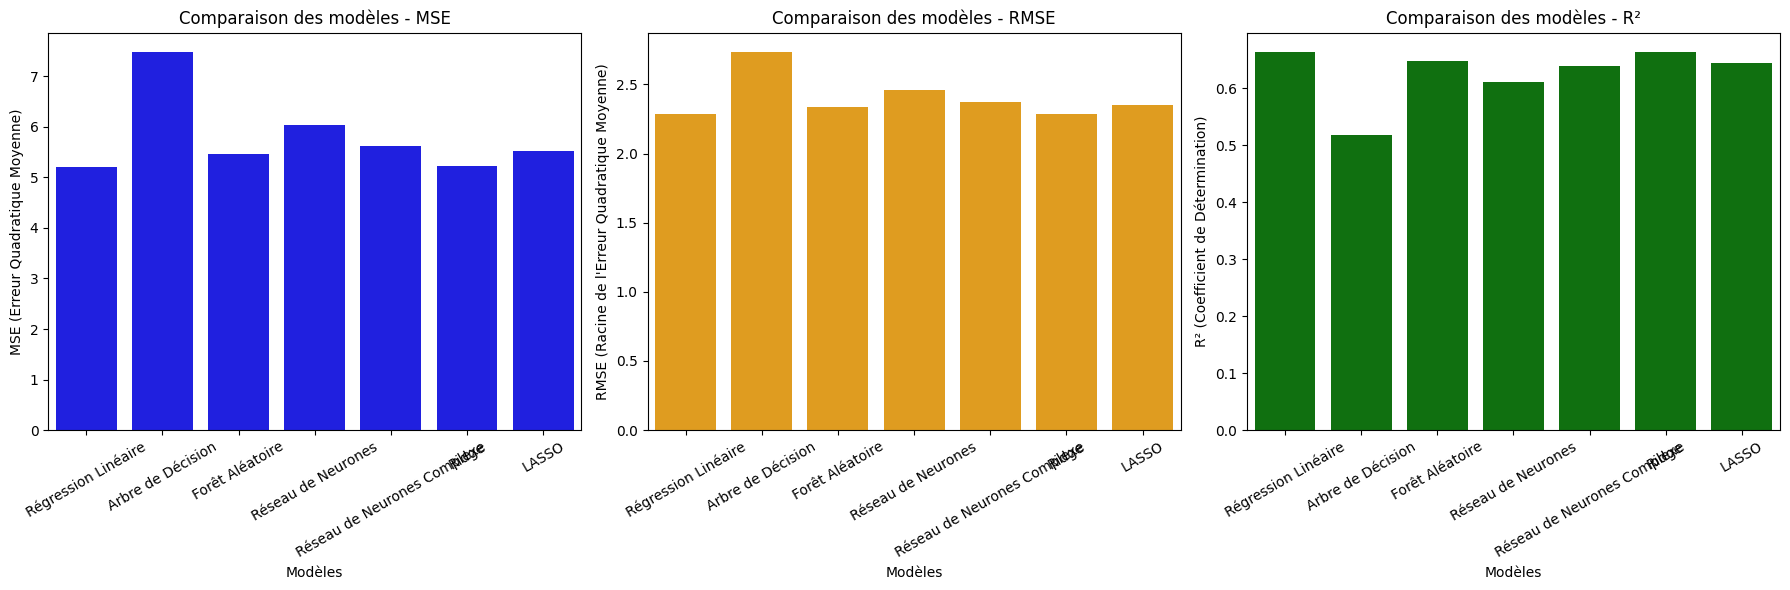

In [225]:
models = ['Régression Linéaire', 'Arbre de Décision', 'Forêt Aléatoire', 'Réseau de Neurones', 'Réseau de Neurones Complexe', 'Ridge', 'LASSO']
mse_scores = [mse_lr_test, mse_dt_test, mse_rf_test, mse_nn_test, mse_nn_test_complex , mse_ridge_test, mse_lasso_test]
rmse_scores = [rmse_lr_test, rmse_dt_test, rmse_rf_test, rmse_nn_test, rmse_nn_test_complex, rmse_ridge_test, rmse_lasso_test]
r2_scores = [r2_lr_test, r2_dt_test, r2_rf_test, r2_nn_test, r2_nn_test_complex, r2_ridge_test, r2_lasso_test]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x=models, y=mse_scores, color='blue', ax=axes[0])
axes[0].set_ylabel('MSE (Erreur Quadratique Moyenne)')
axes[0].set_xlabel('Modèles')
axes[0].set_title('Comparaison des modèles - MSE')
axes[0].tick_params(axis='x', rotation=30)

sns.barplot(x=models, y=rmse_scores, color='orange', ax=axes[1])
axes[1].set_ylabel('RMSE (Racine de l\'Erreur Quadratique Moyenne)')
axes[1].set_xlabel('Modèles')
axes[1].set_title('Comparaison des modèles - RMSE')
axes[1].tick_params(axis='x', rotation=30)

sns.barplot(x=models, y=r2_scores, color='green', ax=axes[2])
axes[2].set_ylabel('R² (Coefficient de Détermination)')
axes[2].set_xlabel('Modèles')
axes[2].set_title('Comparaison des modèles - R²')
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout() 
plt.show()

Commentaire : 

### Pour les modèles par Genre

In [219]:
# Modèles utilisés
models = ['Régression Linéaire', 'Arbre de Décision', 'Forêt Aléatoire', 'Réseau de Neurones', 
           'Ridge', 'LASSO']

# Scores pour les hommes
mse_scores_h = [mse_h_test, mse_dt_h_test, mse_rf_test_h, mse_nn_test_h, mse_ridge_test_h, mse_lasso_test_h]
rmse_scores_h = [rmse_h_test, rmse_dt_h_test, rmse_rf_test_h, rmse_nn_test_h, rmse_ridge_test_h, rmse_lasso_test_h]
r2_scores_h = [r2_h_test, r2_dt_h_test, r2_rf_test_h, r2_nn_test_h, r2_ridge_test_h, r2_lasso_test_h]

# Scores pour les femmes
mse_scores_f = [mse_f_test, mse_dt_f_test, mse_rf_test_f, mse_nn_test_f, mse_ridge_test_f, mse_lasso_test_f]
rmse_scores_f = [rmse_f_test, rmse_dt_f_test, rmse_rf_test_f, rmse_nn_test_f, rmse_ridge_test_f, rmse_lasso_test_f]
r2_scores_f = [r2_f_test, r2_dt_f_test, r2_rf_test_f, r2_nn_test_f, r2_ridge_test_f, r2_lasso_test_f]

# Créer des DataFrames pour hommes et femmes
results_df_h = pd.DataFrame({
    'Modèle': models,
    'MSE (Hommes)': mse_scores_h,
    'RMSE (Hommes)': rmse_scores_h,
    'R² (Hommes)': r2_scores_h
})

results_df_f = pd.DataFrame({
    'Modèle': models,
    'MSE (Femmes)': mse_scores_f,
    'RMSE (Femmes)': rmse_scores_f,
    'R² (Femmes)': r2_scores_f
})

# Affichage des résultats
print("Résultats pour les Hommes :")
print(results_df_h)

print("\nRésultats pour les Femmes :")
print(results_df_f)

Résultats pour les Hommes :
                Modèle  MSE (Hommes)  RMSE (Hommes)  R² (Hommes)
0  Régression Linéaire      5.608039       2.368130     0.628686
1    Arbre de Décision      8.935580       2.989244     0.408366
2      Forêt Aléatoire      5.994882       2.448445     0.603072
3   Réseau de Neurones      6.431693       2.536078     0.574151
4                Ridge      5.611803       2.368924     0.628436
5                LASSO      5.630905       2.372953     0.627172

Résultats pour les Femmes :
                Modèle  MSE (Femmes)  RMSE (Femmes)  R² (Femmes)
0  Régression Linéaire      6.904265       2.627597     0.622295
1    Arbre de Décision     10.061052       3.171916     0.449600
2      Forêt Aléatoire      7.308302       2.703387     0.600192
3   Réseau de Neurones      8.465660       2.909581     0.536877
4                Ridge      6.903889       2.627525     0.622316
5                LASSO      6.897207       2.626253     0.622681


In [ ]:
Interprétation : 

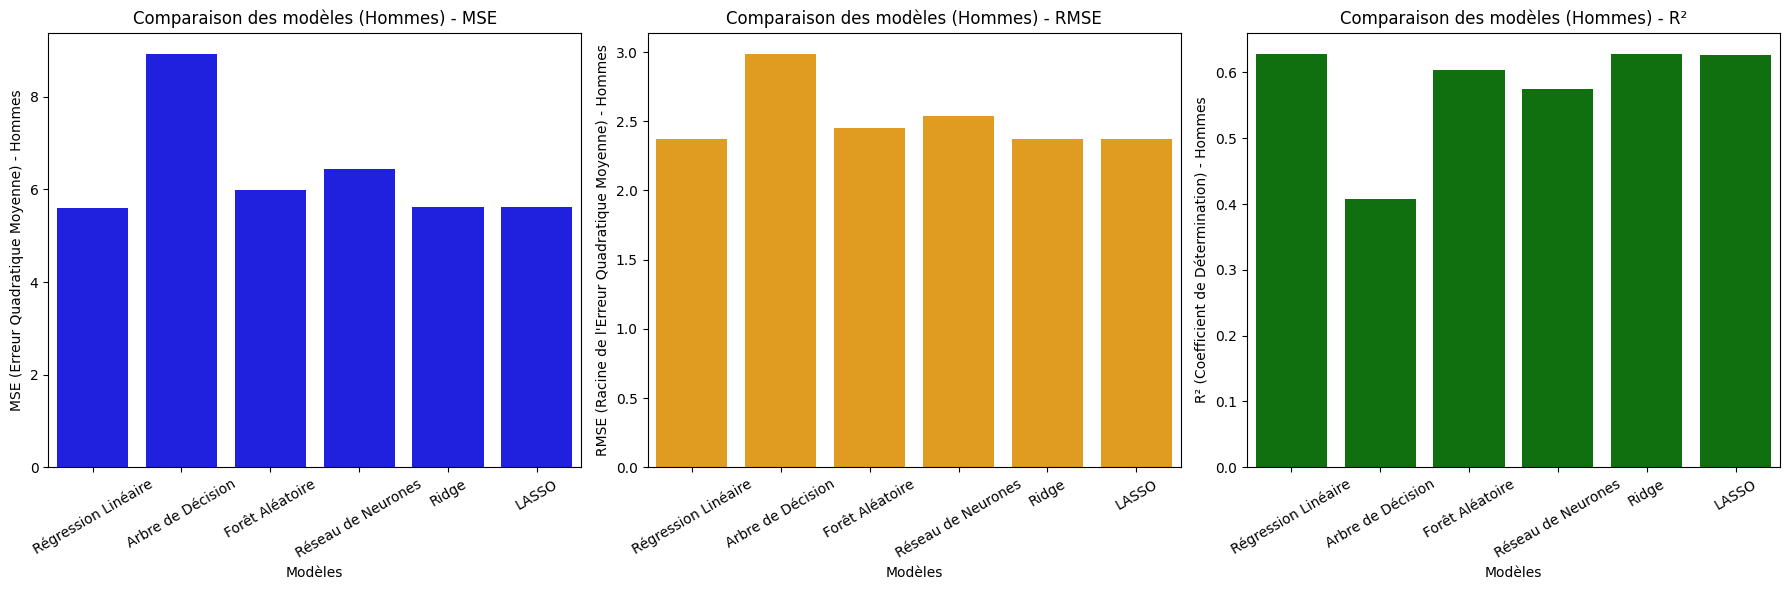

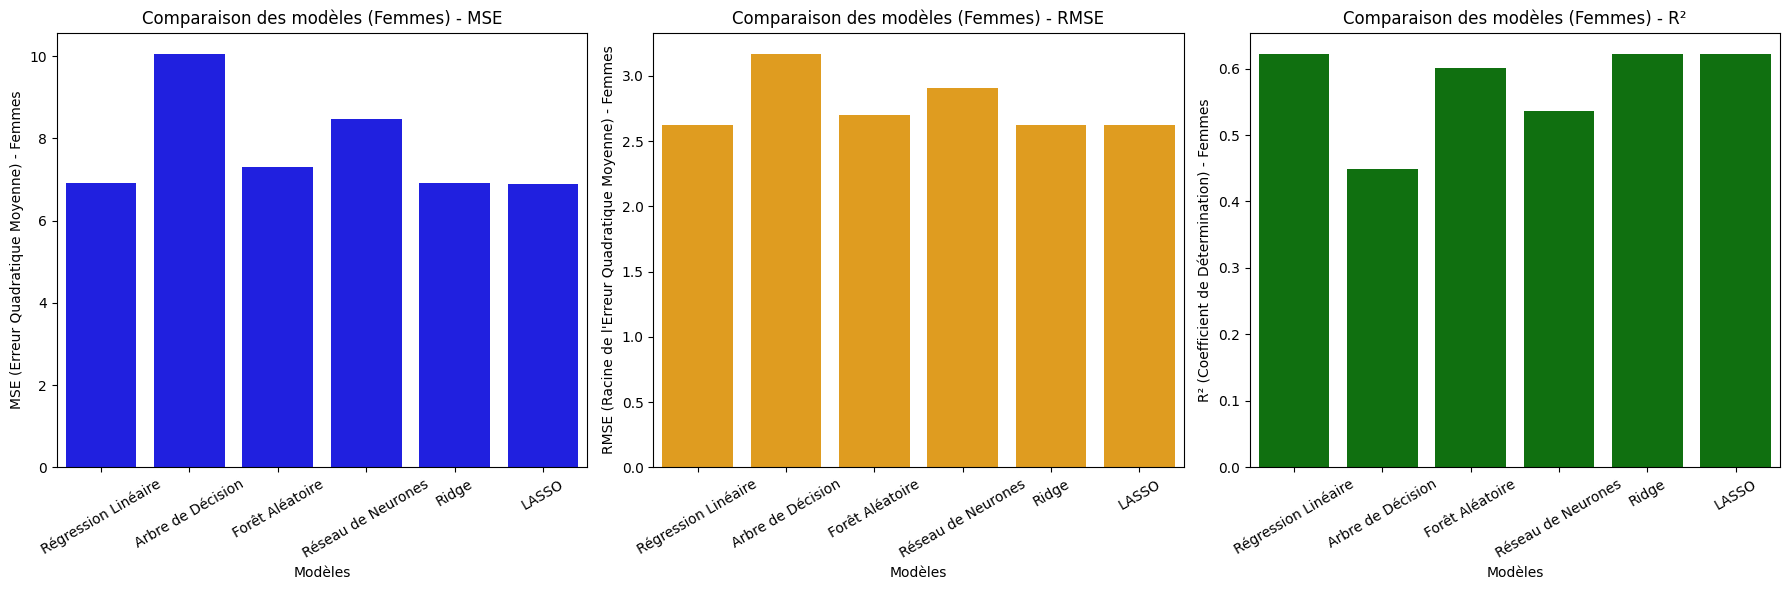

In [223]:
# Modèles
models = ['Régression Linéaire', 'Arbre de Décision', 'Forêt Aléatoire', 'Réseau de Neurones', 
           'Ridge', 'LASSO']

# Scores pour les hommes
mse_scores_h = [mse_h_test, mse_dt_h_test, mse_rf_test_h, mse_nn_test_h, mse_ridge_test_h, mse_lasso_test_h]
rmse_scores_h = [rmse_h_test, rmse_dt_h_test, rmse_rf_test_h, rmse_nn_test_h, rmse_ridge_test_h, rmse_lasso_test_h]
r2_scores_h = [r2_h_test, r2_dt_h_test, r2_rf_test_h, r2_nn_test_h, r2_ridge_test_h, r2_lasso_test_h]

# Scores pour les femmes
mse_scores_f = [mse_f_test, mse_dt_f_test, mse_rf_test_f, mse_nn_test_f, mse_ridge_test_f, mse_lasso_test_f]
rmse_scores_f = [rmse_f_test, rmse_dt_f_test, rmse_rf_test_f, rmse_nn_test_f, rmse_ridge_test_f, rmse_lasso_test_f]
r2_scores_f = [r2_f_test, r2_dt_f_test, r2_rf_test_f, r2_nn_test_f, r2_ridge_test_f, r2_lasso_test_f]

# Visualisation pour les hommes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x=models, y=mse_scores_h, color='blue', ax=axes[0])
axes[0].set_ylabel('MSE (Erreur Quadratique Moyenne) - Hommes')
axes[0].set_xlabel('Modèles')
axes[0].set_title('Comparaison des modèles (Hommes) - MSE')
axes[0].tick_params(axis='x', rotation=30)

sns.barplot(x=models, y=rmse_scores_h, color='orange', ax=axes[1])
axes[1].set_ylabel('RMSE (Racine de l\'Erreur Quadratique Moyenne) - Hommes')
axes[1].set_xlabel('Modèles')
axes[1].set_title('Comparaison des modèles (Hommes) - RMSE')
axes[1].tick_params(axis='x', rotation=30)

sns.barplot(x=models, y=r2_scores_h, color='green', ax=axes[2])
axes[2].set_ylabel('R² (Coefficient de Détermination) - Hommes')
axes[2].set_xlabel('Modèles')
axes[2].set_title('Comparaison des modèles (Hommes) - R²')
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# Visualisation pour les femmes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x=models, y=mse_scores_f, color='blue', ax=axes[0])
axes[0].set_ylabel('MSE (Erreur Quadratique Moyenne) - Femmes')
axes[0].set_xlabel('Modèles')
axes[0].set_title('Comparaison des modèles (Femmes) - MSE')
axes[0].tick_params(axis='x', rotation=30)

sns.barplot(x=models, y=rmse_scores_f, color='orange', ax=axes[1])
axes[1].set_ylabel('RMSE (Racine de l\'Erreur Quadratique Moyenne) - Femmes')
axes[1].set_xlabel('Modèles')
axes[1].set_title('Comparaison des modèles (Femmes) - RMSE')
axes[1].tick_params(axis='x', rotation=30)

sns.barplot(x=models, y=r2_scores_f, color='green', ax=axes[2])
axes[2].set_ylabel('R² (Coefficient de Détermination) - Femmes')
axes[2].set_xlabel('Modèles')
axes[2].set_title('Comparaison des modèles (Femmes) - R²')
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

## 6. Conclusion

## Analyse des meilleurs modèles en excluant la Régression Linéaire

### Pour le modèle Global

### Meilleur modèle global (hors Régression Linéaire) :

- **Meilleure métrique MSE (hors Régression Linéaire) :**
  - Ridge avec MSE = 5.216237.

- **Meilleure métrique RMSE (hors Régression Linéaire) :**
  - Ridge avec RMSE = 2.283908.

- **Meilleure métrique R² (hors Régression Linéaire) :**
  - Ridge avec R² = 0.664320.

- **Meilleur modèle global (hors Régression Linéaire) :**
  - **Ridge**, car il obtient les meilleures performances en termes de MSE et RMSE, tout en ayant un R² très proche de celui de la Régression Linéaire.

,y_test,y_pred_ridge,diff_ridge
2814,74,73.367043,0.632957
4421,66,65.505697,0.494303
4282,70,70.500504,0.500504
1246,72,70.392011,1.607989
4699,67,67.245463,0.245463
...,...,...,...
6220,69,68.483108,0.516892
5485,65,64.832582,0.167418
5076,63,65.294246,2.294246
6503,67,68.440669,1.440669


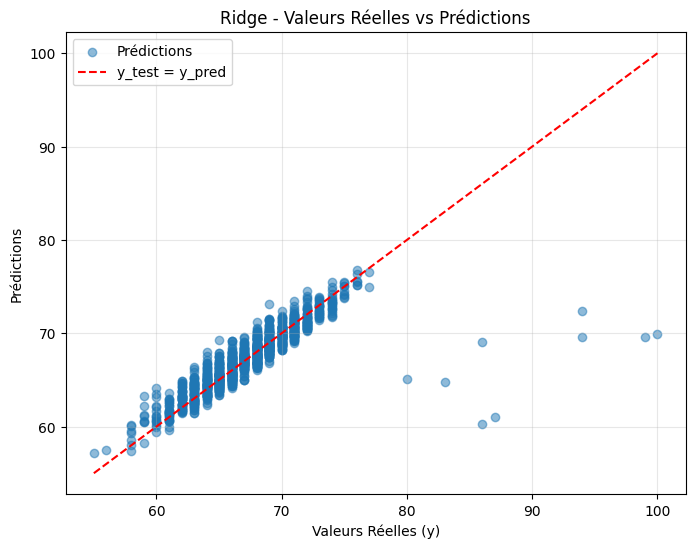

In [156]:
# Comparer y_test et y_pred pour le modèle choisi
results_df1 = pd.DataFrame({
    "y_test": y_test,
    "y_pred_ridge": y_pred_ridge_test  
})

# Calculer l'écart absolu pour le modèle
results_df1["diff_ridge"] = abs(results_df1["y_test"] - results_df1["y_pred_ridge"])

# Afficher les premières lignes pour vérifier
display(results_df1)

# Visualisation - Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(results_df1["y_test"], results_df1["y_pred_ridge"], alpha=0.5, label="Prédictions")
plt.plot(
    [results_df1["y_test"].min(), results_df1["y_test"].max()],
    [results_df1["y_test"].min(), results_df1["y_test"].max()],
    color="red",
    linestyle="--",
    label="y_test = y_pred"
)
plt.title("Ridge - Valeurs Réelles vs Prédictions", fontsize=12)
plt.xlabel("Valeurs Réelles (y)")
plt.ylabel("Prédictions")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

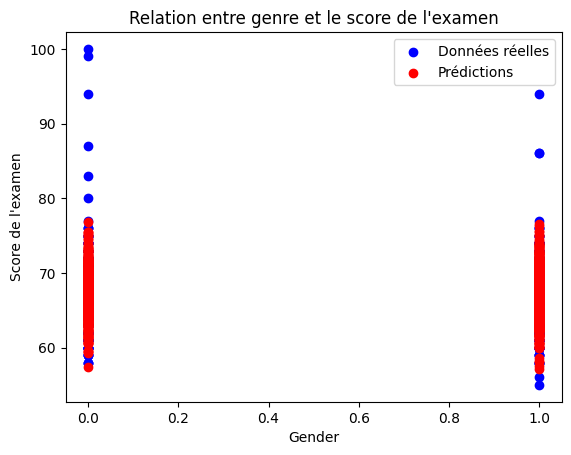

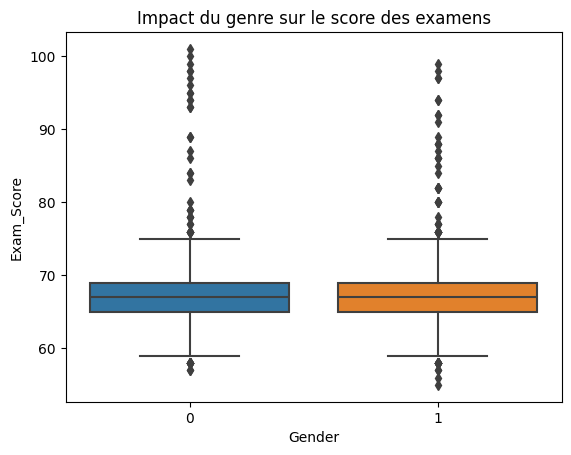

In [238]:
plt.scatter(X_test['Gender'], y_test, color='blue', label='Données réelles')
plt.scatter(X_test['Gender'], y_pred_ridge_test, color='red', label='Prédictions')
plt.xlabel('Gender')
plt.ylabel('Score de l\'examen')
plt.legend()
plt.title('Relation entre genre et le score de l\'examen')
plt.show()

sns.boxplot(x='Gender', y='Exam_Score', data=df)
plt.title('Impact du genre sur le score des examens')
plt.show()

Interprétation : 

### Pour les Femmes :

- **Meilleure métrique MSE (hors Régression Linéaire) :**
  - LASSO avec MSE = 6.897207.

- **Meilleure métrique RMSE (hors Régression Linéaire) :**
  - LASSO avec RMSE = 2.626253.

- **Meilleure métrique R² (hors Régression Linéaire) :**
  - LASSO avec R² = 0.622681.

- **Meilleur modèle global pour les femmes (hors Régression Linéaire) :**
  - LASSO, car il conserve sa supériorité sur les métriques restantes.


,y_test_f,y_pred_lasso_f
3318,69,69.426357
5454,66,67.648260
964,64,63.820248
1362,67,67.034668
6350,75,74.916058
...,...,...
2388,71,71.490187
3194,65,64.573434
3617,73,72.839010
915,67,66.641620


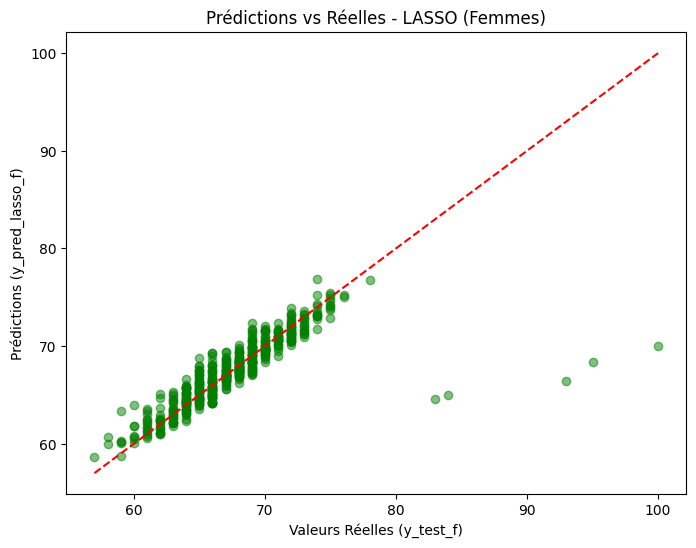

In [228]:
# Femmes
results_f = pd.DataFrame({
    'y_test_f': y_test_f,  # Valeurs réelles pour les Femmes
    'y_pred_lasso_f': y_pred_lasso_test_f,  # Prédictions pour le LASSO (meilleur modèle)
})

# Affichage des tables
display(results_f)

# Visualisation pour les Femmes
plt.figure(figsize=(8, 6))
plt.scatter(results_f['y_test_f'], results_f['y_pred_lasso_f'], alpha=0.5, color='green')
plt.plot([results_f['y_test_f'].min(), results_f['y_test_f'].max()],
         [results_f['y_test_f'].min(), results_f['y_test_f'].max()], color='red', linestyle="--")
plt.title("Prédictions vs Réelles - LASSO (Femmes)")
plt.xlabel("Valeurs Réelles (y_test_f)")
plt.ylabel("Prédictions (y_pred_lasso_f)")
plt.show()

Interprétation : 

### Pour les Hommes :

- **Meilleure métrique MSE (hors Régression Linéaire) :**
  - Forêt Aléatoire avec MSE = 5.994882.

- **Meilleure métrique RMSE (hors Régression Linéaire) :**
  - Forêt Aléatoire avec RMSE = 2.448445.

- **Meilleure métrique R² (hors Régression Linéaire) :**
  - Forêt Aléatoire avec R² = 0.603072.

- **Meilleur modèle global pour les hommes (hors Régression Linéaire) :**
  - Forêt Aléatoire, car elle obtient les meilleures performances sur toutes les métriques restantes.


,y_test_h,y_pred_rf_h
6534,66,65.877076
6186,71,70.405346
858,64,63.703849
1617,69,67.770575
5324,67,66.580330
...,...,...
1413,71,72.108426
6357,69,66.152317
4605,66,68.468971
6256,73,73.071574


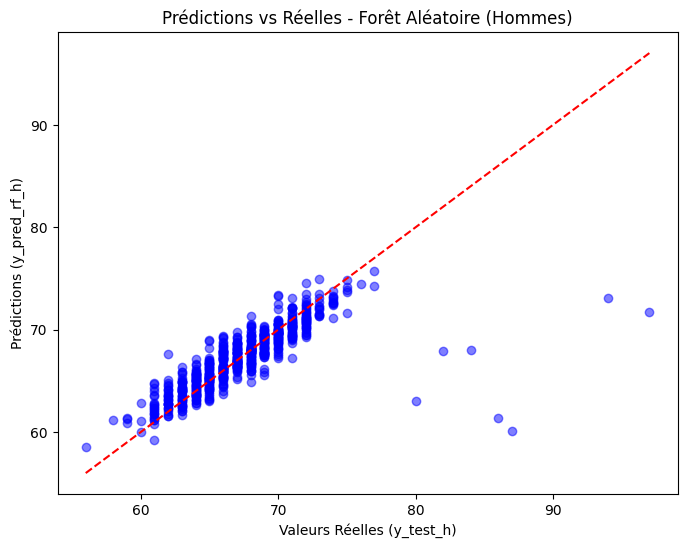

In [230]:
# Hommes
results_h = pd.DataFrame({
    'y_test_h': y_test_h,  # Valeurs réelles pour les Hommes
    'y_pred_rf_h': y_pred_rf_test_h,  # Prédictions pour la Forêt Aléatoire (meilleur modèle)
})
# Affichage des tables
display(results_h)

# Visualisation pour les Hommes
plt.figure(figsize=(8, 6))
plt.scatter(results_h['y_test_h'], results_h['y_pred_rf_h'], alpha=0.5, color='blue')
plt.plot([results_h['y_test_h'].min(), results_h['y_test_h'].max()],
         [results_h['y_test_h'].min(), results_h['y_test_h'].max()], color='red', linestyle="--")
plt.title("Prédictions vs Réelles - Forêt Aléatoire (Hommes)")
plt.xlabel("Valeurs Réelles (y_test_h)")
plt.ylabel("Prédictions (y_pred_rf_h)")
plt.show()

Interprétation : 

Conclusion finanle : 